In [1]:
import sys
sys.path.insert(1, '/gscratch/stf/zachmon/covid/covid-bcr/scripts/')
from plotting_helper import *
from abstar_pipeline import *

In [2]:
global_dpi = 300

In [3]:
files = get_files('/gscratch/stf/zachmon/covid/11_3_lineages_bulk_plasma_rbd_ntd/sc_lins/stats','stats.json')

# bulk sequence features

In [4]:
progenitor_data, progenitor_averages = get_stats(files,rep_type='bulk')
nonsingleton_data, nonsingleton_averages = get_stats(files,rep_type='bulk',statstype='nonsingletons')

In [5]:
dict_bulk_prog_cdr3 = {'severity': [], 'mean_cdr3': [], 'type': []}
dict_bulk_nonsing_cdr3 = {'severity': [], 'mean_cdr3': [], 'type': []}
for severity in progenitor_data:
    for cdr3_data in progenitor_data[severity]['cdr3 length']:
        dict_bulk_prog_cdr3['severity'].append(severity)
        dict_bulk_prog_cdr3['mean_cdr3'].append(np.mean(cdr3_data))
        dict_bulk_prog_cdr3['type'].append('bulk')
for severity in nonsingleton_data:
    for cdr3_data in nonsingleton_data[severity]['cdr3 length']:
        dict_bulk_nonsing_cdr3['severity'].append(severity)
        dict_bulk_nonsing_cdr3['mean_cdr3'].append(np.mean(cdr3_data))
        dict_bulk_nonsing_cdr3['type'].append('bulk') 
df_bulk_prog_cdr3_means = pd.DataFrame(dict_bulk_prog_cdr3)
df_bulk_nonsing_cdr3_means = pd.DataFrame(dict_bulk_nonsing_cdr3)

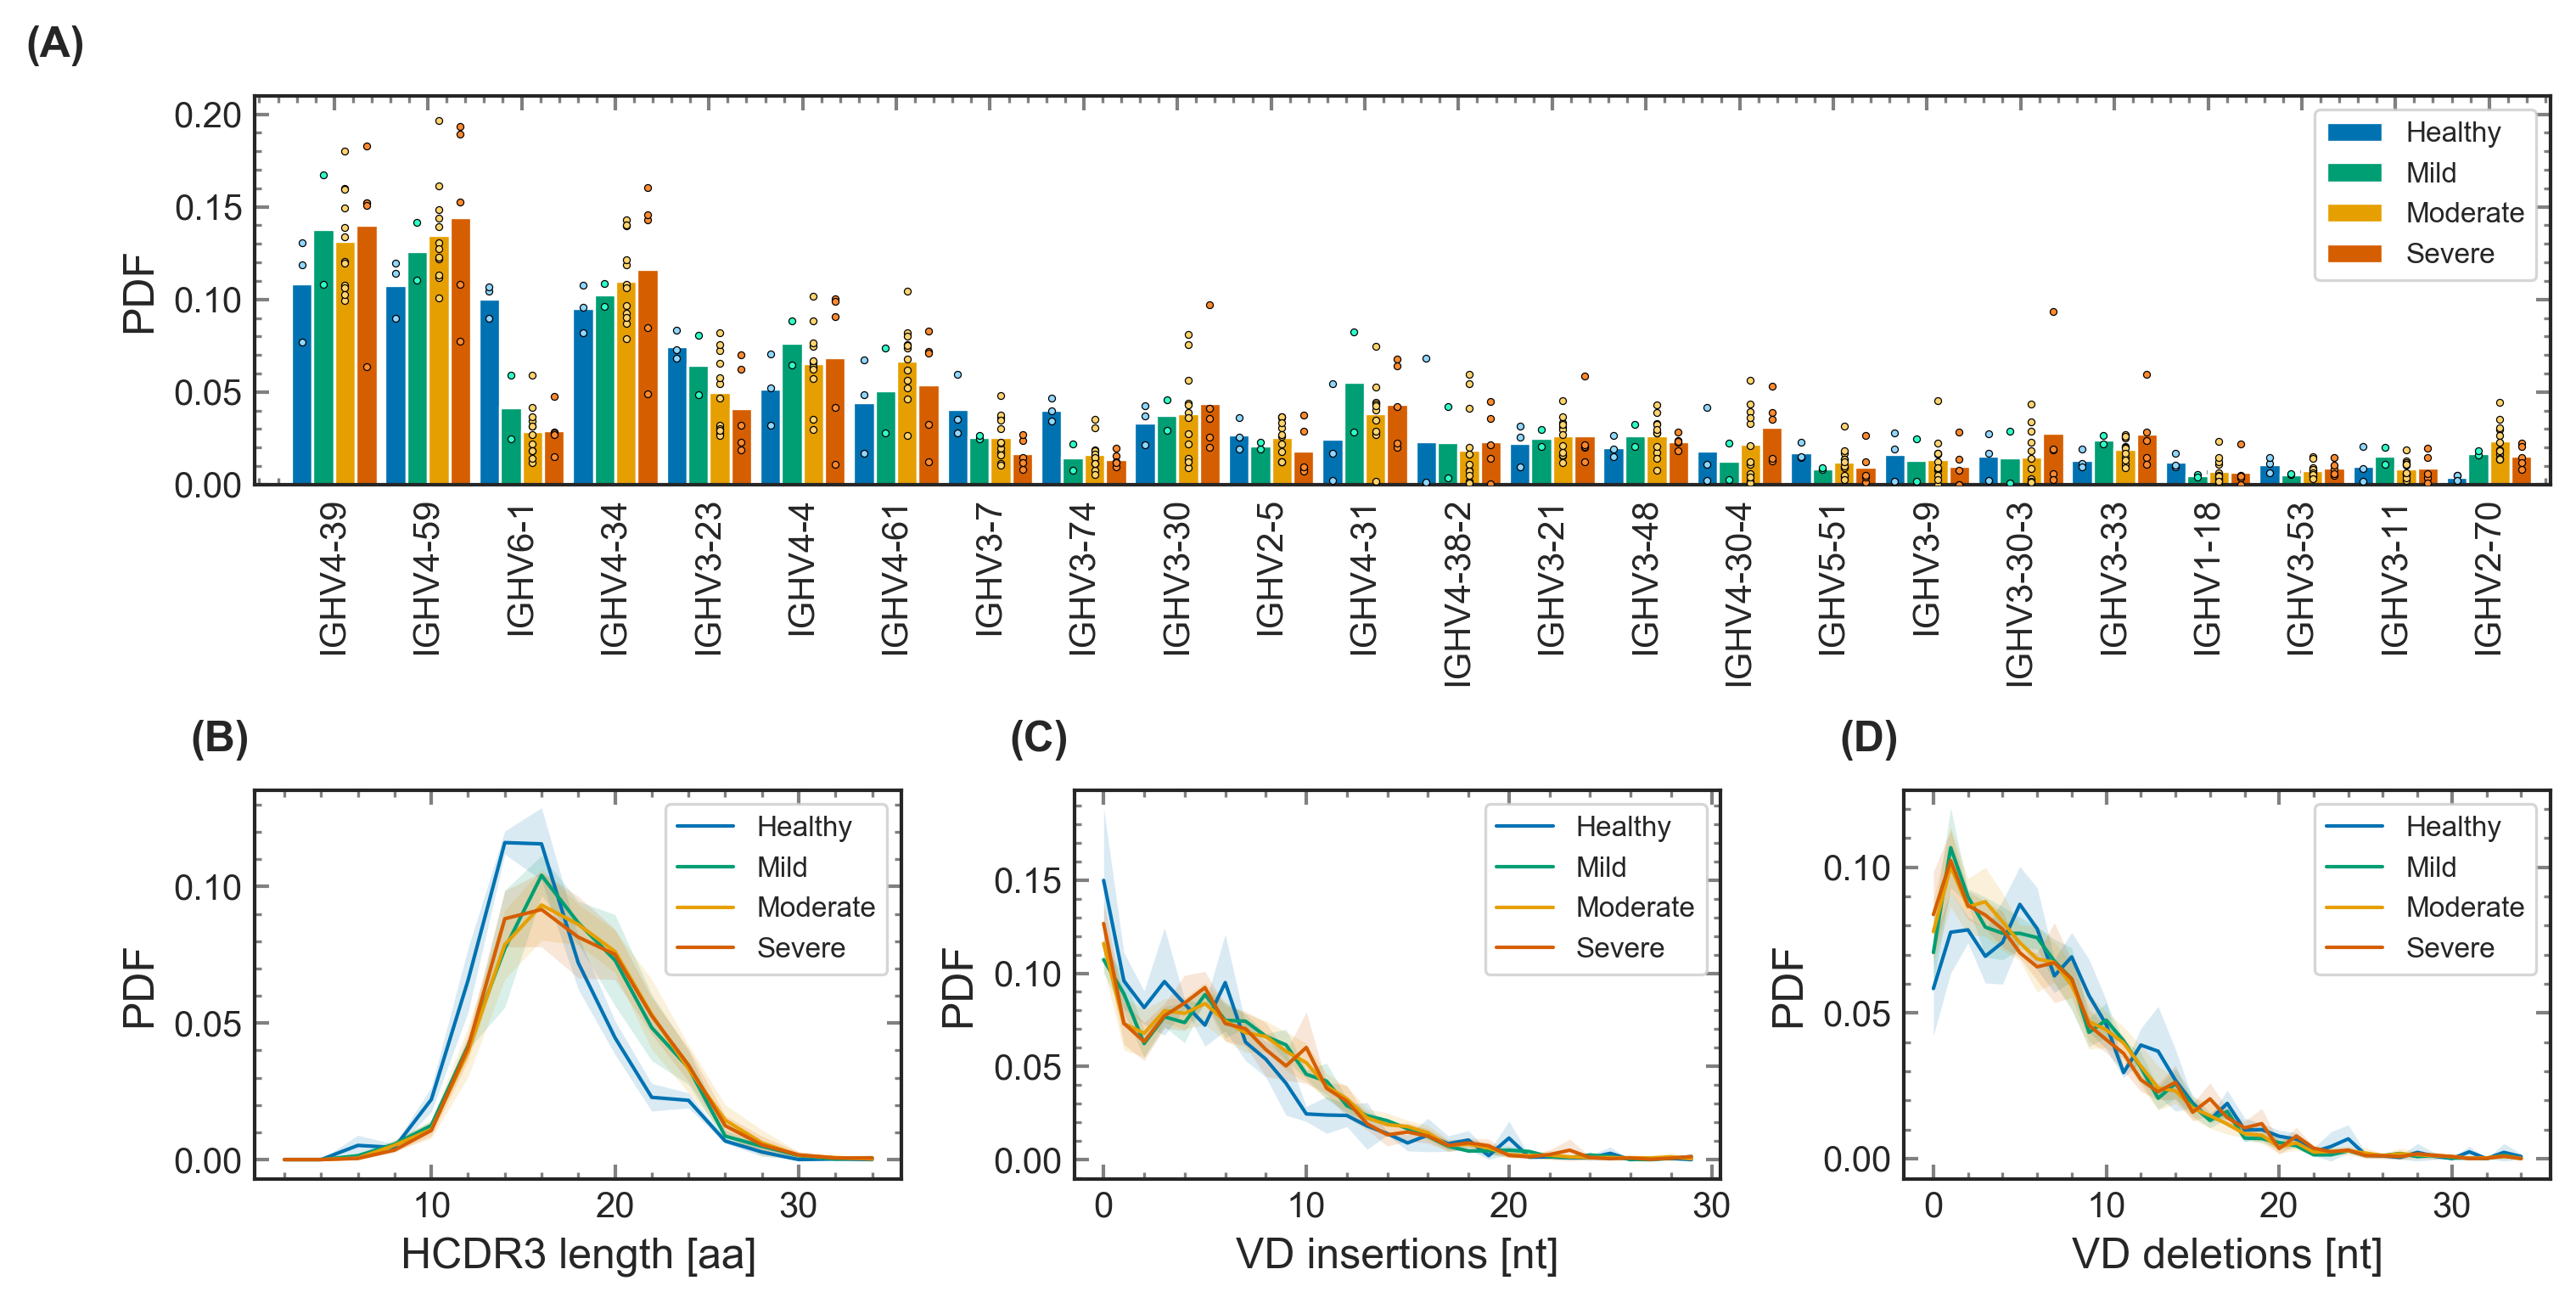

In [6]:
sns.set(context='paper', style='white')
fig = plt.figure(dpi=global_dpi,figsize=(10,5),constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=3, wspace=0.025, hspace=0.05)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[1, 2])
cohort_bar(progenitor_averages, progenitor_data,'v gene',
           ax=ax0, yaxis_upper=0.21, labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(progenitor_averages, 'cdr3 length', ax1, labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(progenitor_averages, 'vd ins', ax2, labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(progenitor_averages, 'vd del', ax3, labelsize=12, ticksize=10, legendsize=8)
for n, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.text(-0.1, 1.1, "("+string.ascii_uppercase[n]+")", transform=ax.transAxes, 
            size=12, weight='bold')
fig.savefig('/usr/lusers/zacmon/covid_figures/Fig3_new.pdf',bbox_inches='tight')
fig.savefig('/usr/lusers/zacmon/covid_figures/Fig3_new.png',bbox_inches='tight')

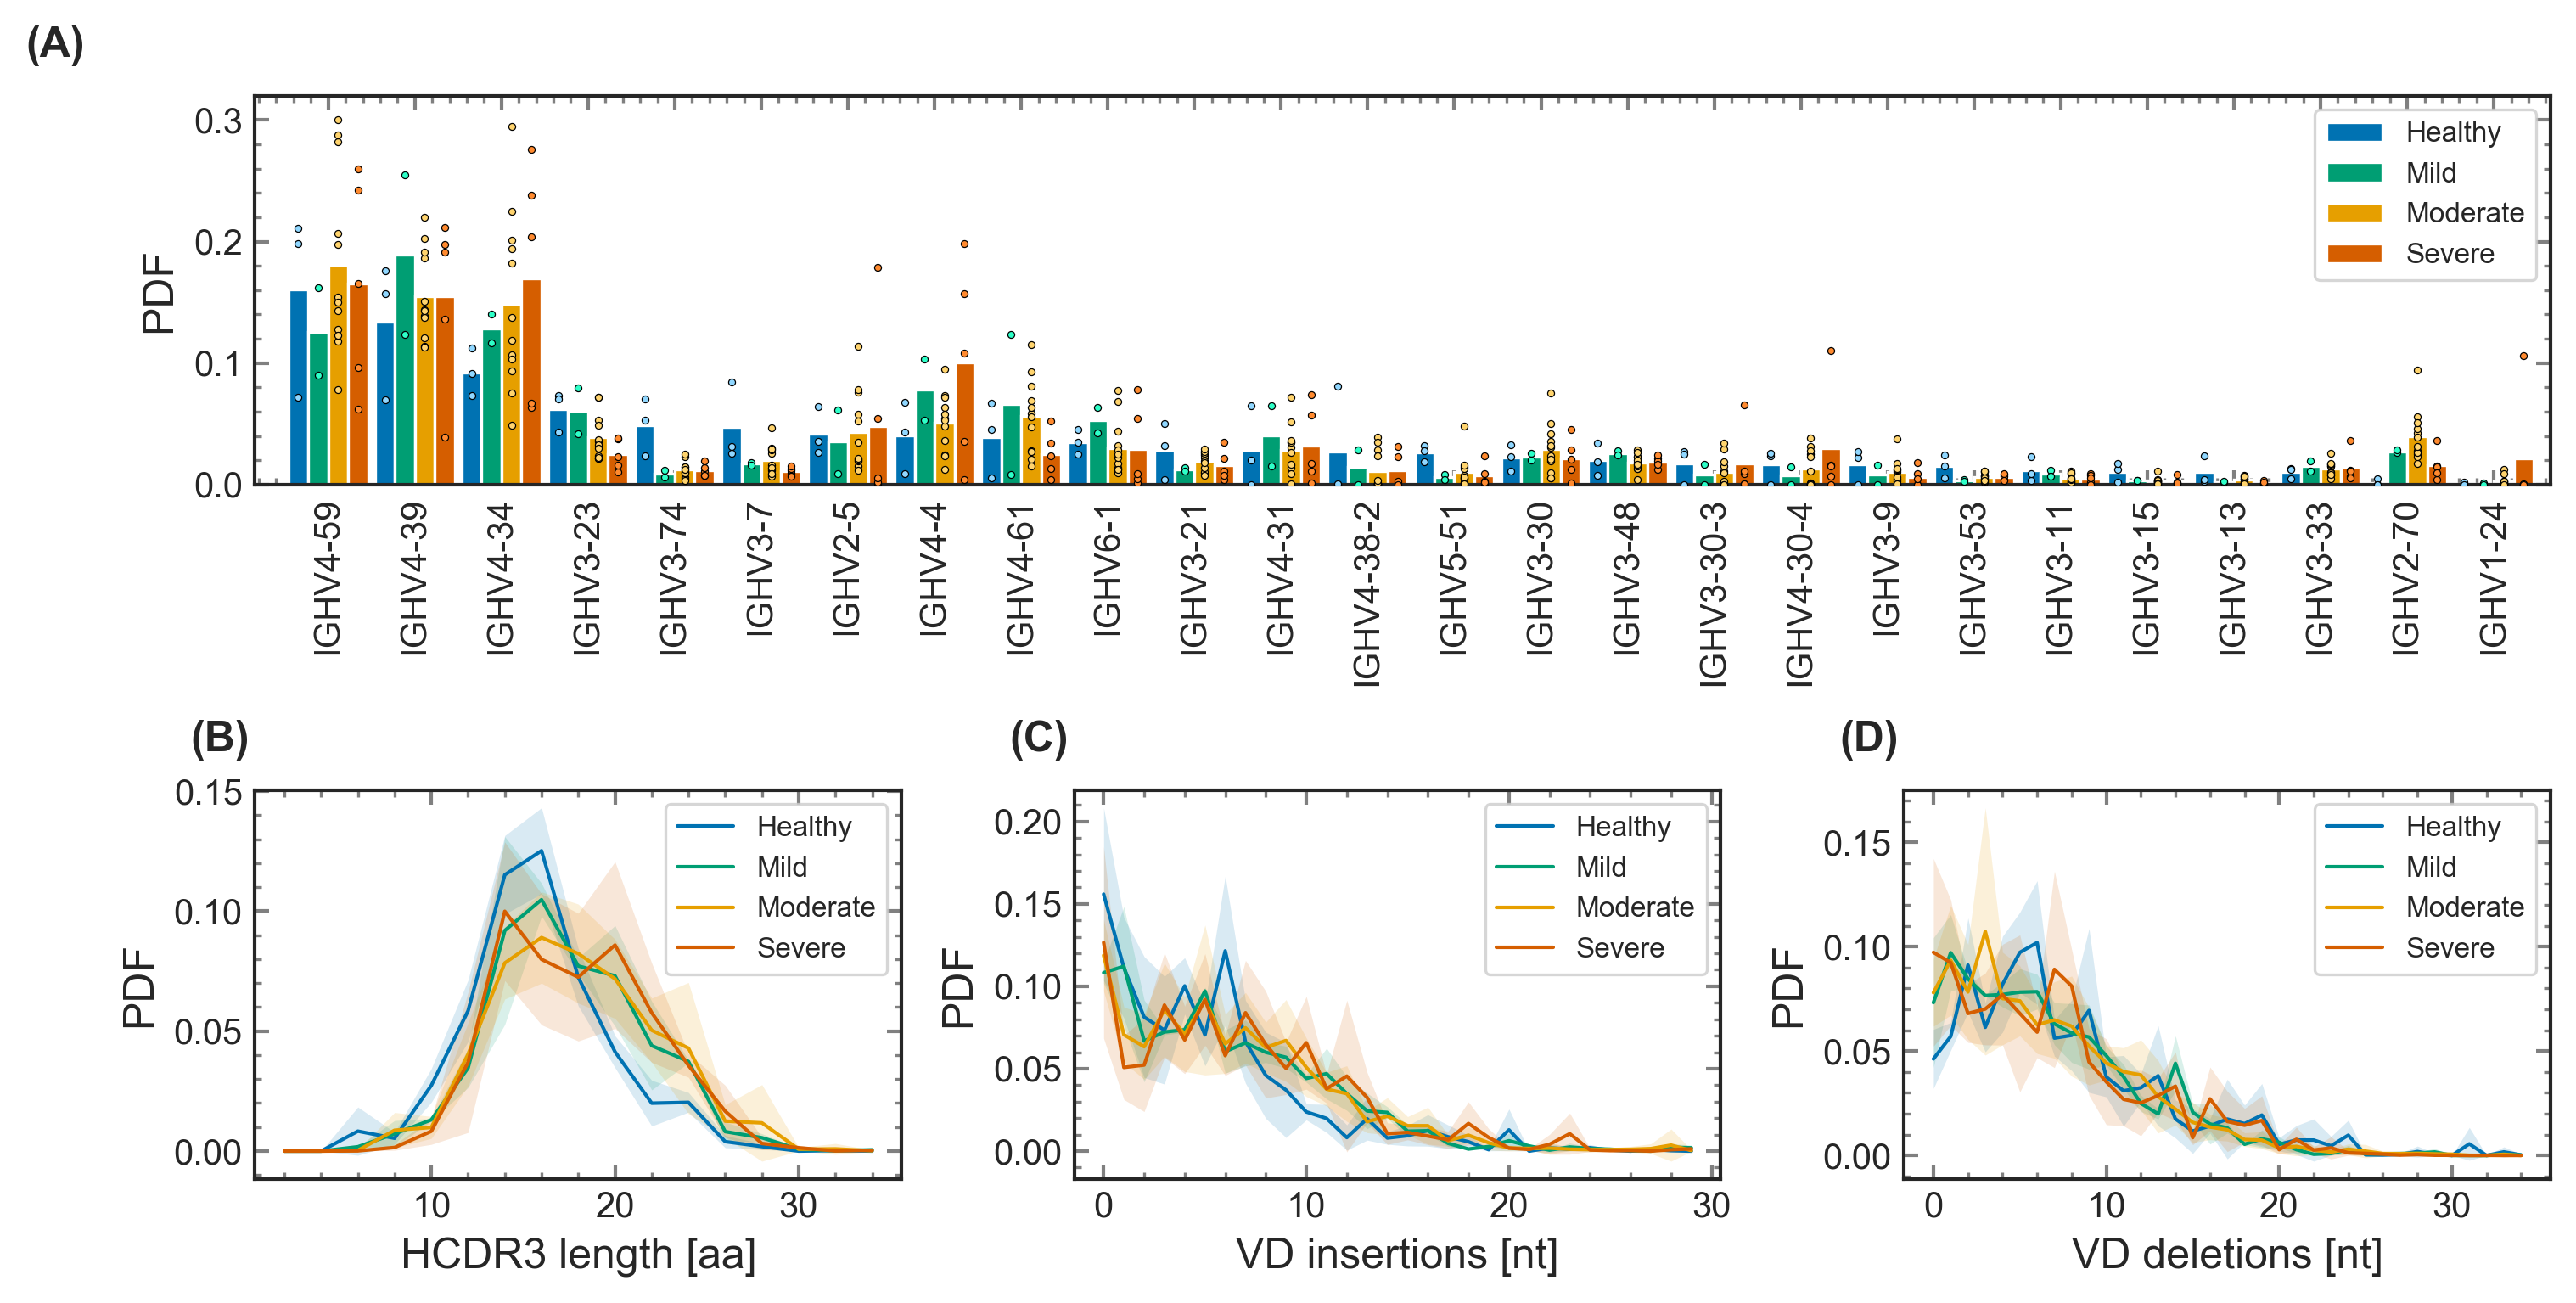

In [7]:
sns.set(context='paper', style='white')
fig = plt.figure(dpi=global_dpi,figsize=(10,5),constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=3, wspace=0.025, hspace=0.05)
ax0 = fig.add_subplot(gs[:-1, :])
ax1 = fig.add_subplot(gs[-1, 0])
ax2 = fig.add_subplot(gs[-1, 1])
ax3 = fig.add_subplot(gs[-1, -1])
cohort_bar(nonsingleton_averages, nonsingleton_data,'v gene',
           ax=ax0, yaxis_upper=0.32, labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(nonsingleton_averages, 'cdr3 length', ax1, labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(nonsingleton_averages, 'vd ins', ax2, labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(nonsingleton_averages, 'vd del', ax3, labelsize=12, ticksize=10, legendsize=8)
for n, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.text(-0.1, 1.1, "("+string.ascii_uppercase[n]+")", transform=ax.transAxes, 
            size=12, weight='bold')
fig.savefig('/usr/lusers/zacmon/covid_figures/FigS4_new.pdf',bbox_inches='tight')
fig.savefig('/usr/lusers/zacmon/covid_figures/FigS4_new.png',bbox_inches='tight')

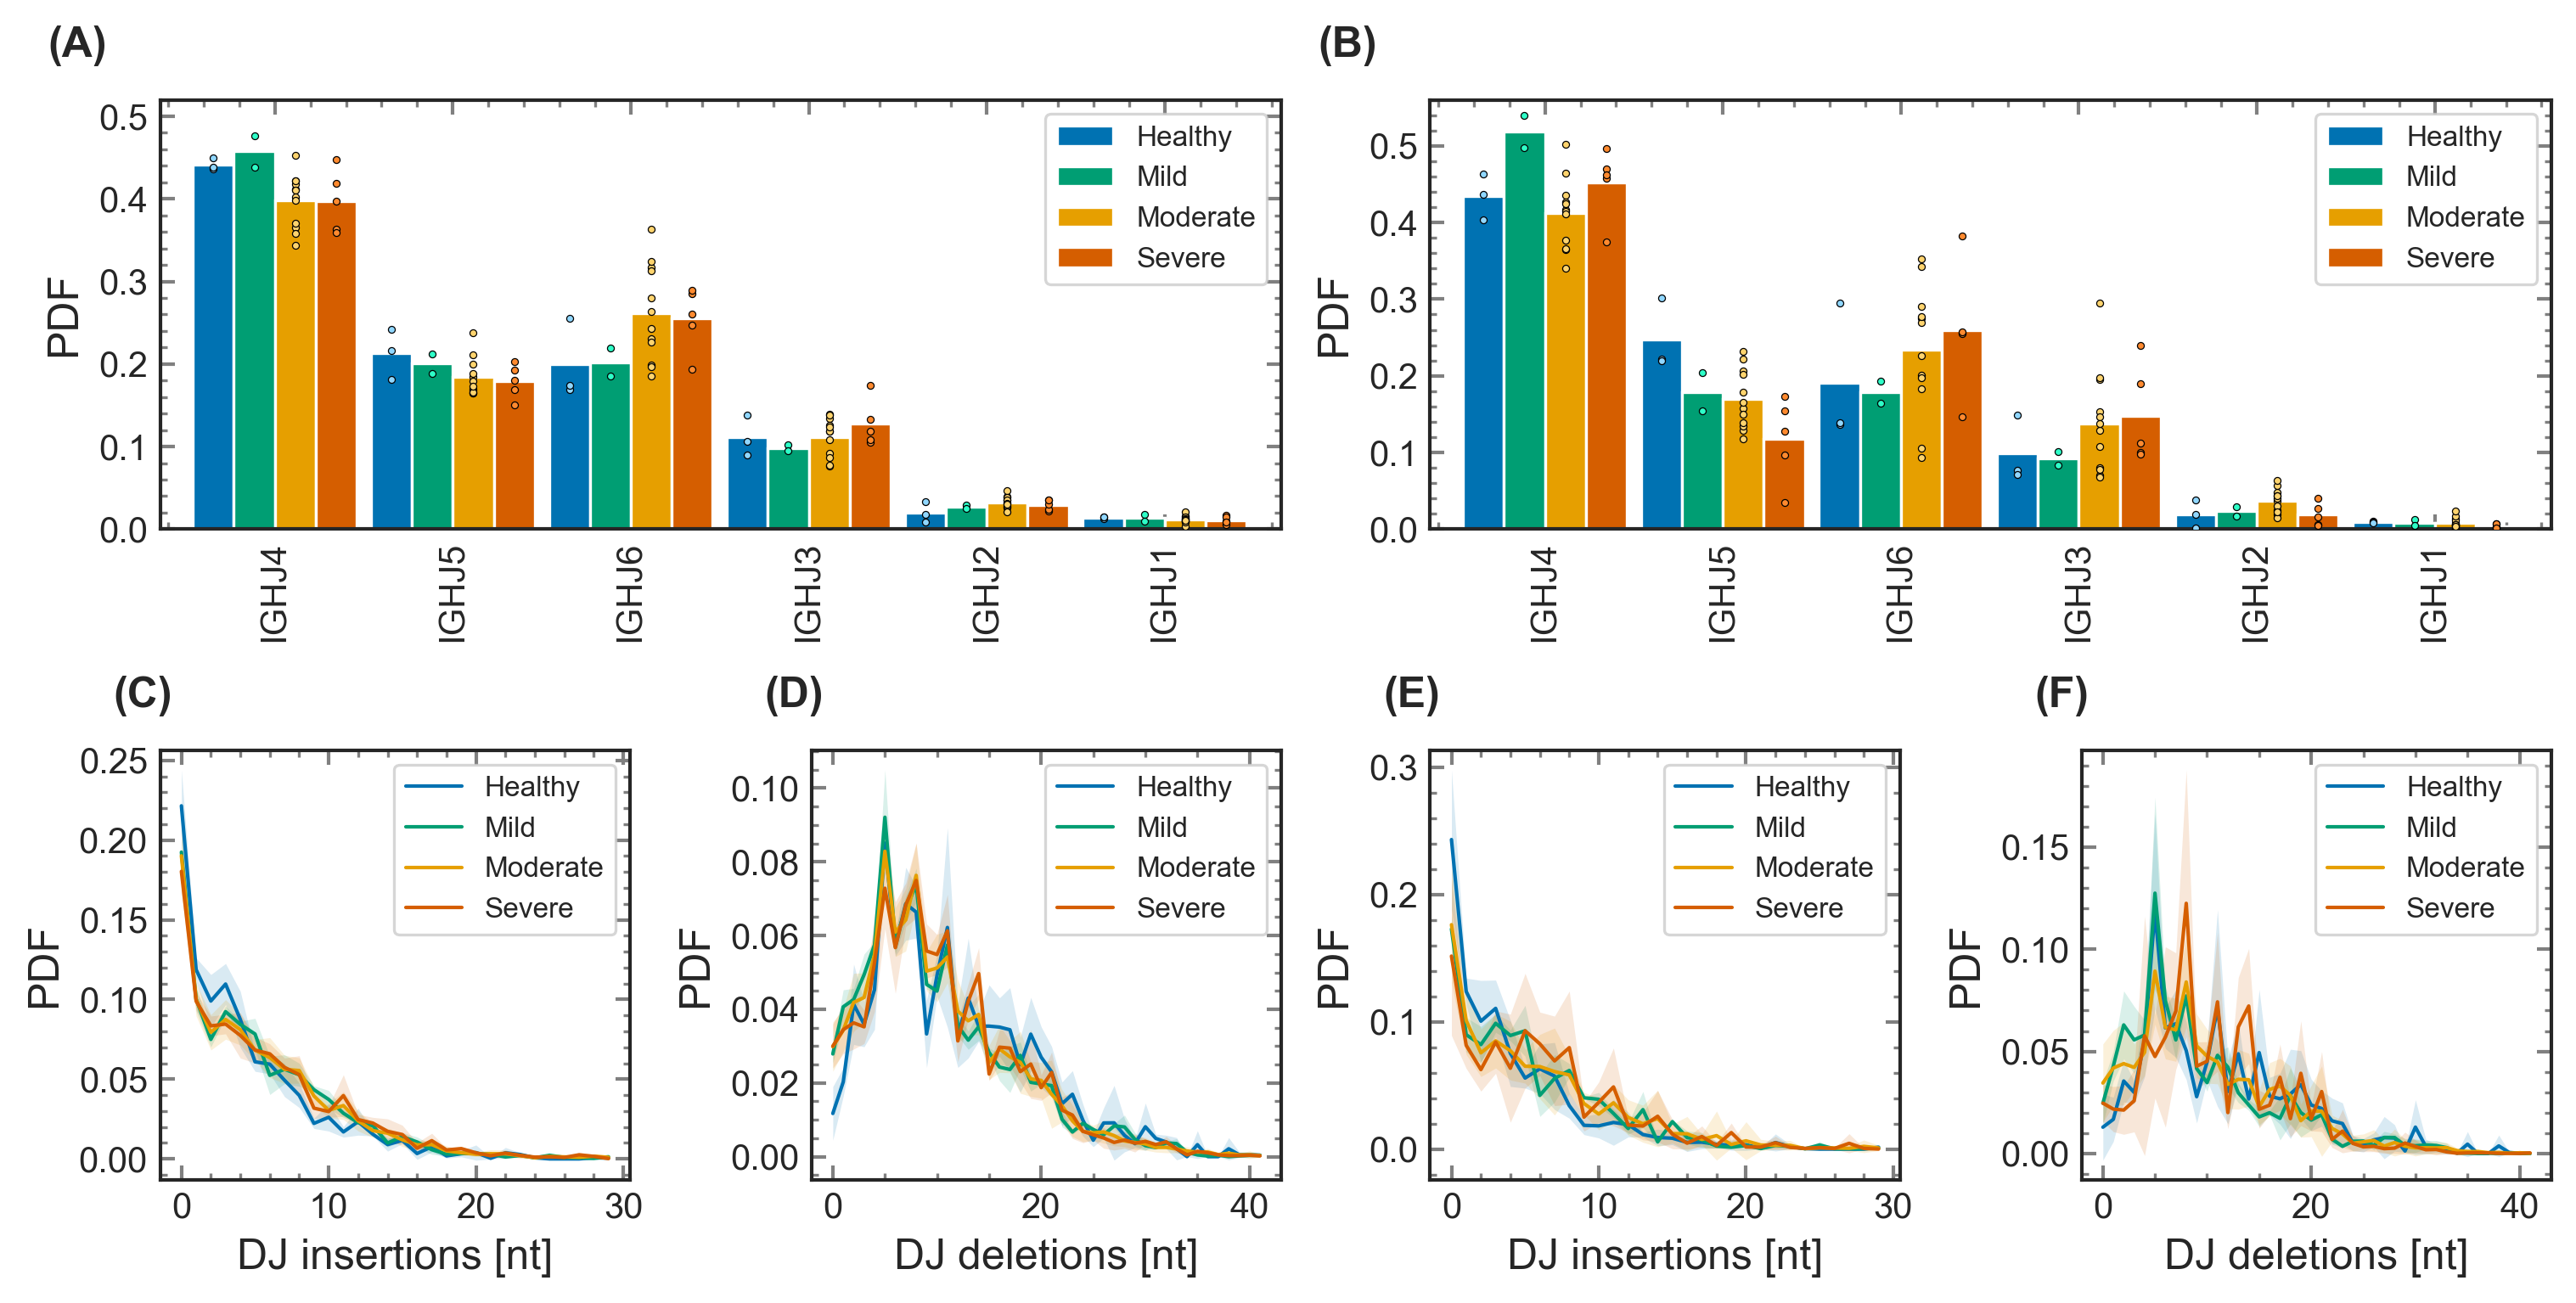

In [8]:
fig = plt.figure(dpi=global_dpi,figsize=(10,5), constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=4, wspace=0.025, hspace=0.05)
jax0 = fig.add_subplot(gs[0, 0:2])
jax1 = fig.add_subplot(gs[0, 2:4])
jax2 = fig.add_subplot(gs[1, 0])
jax3 = fig.add_subplot(gs[1, 1])
jax4 = fig.add_subplot(gs[1, 2])
jax5 = fig.add_subplot(gs[1, 3])
cohort_bar(progenitor_averages, progenitor_data, 'j gene',
           ax=jax0,yaxis_upper=0.52, labelsize=12, ticksize=10, legendsize=8)
cohort_bar(nonsingleton_averages, nonsingleton_data,'j gene',
           ax=jax1,yaxis_upper=0.56, labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(progenitor_averages, 'dj ins', jax2,
                labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(progenitor_averages, 'dj del', jax3,
                labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(nonsingleton_averages, 'dj ins', jax4,
                labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(nonsingleton_averages, 'dj del', jax5,
                labelsize=12, ticksize=10, legendsize=8)
for n, ax in enumerate([jax0, jax1, jax2, jax3, jax4, jax5]):
    ax.text(-0.1, 1.1, "("+string.ascii_uppercase[n]+")", transform=ax.transAxes, 
            size=12, weight='bold')
sns.set(context='paper', style='white')
fig.savefig('/usr/lusers/zacmon/covid_figures/FigS1_new.pdf',bbox_inches='tight')
fig.savefig('/usr/lusers/zacmon/covid_figures/FigS1_new.png',bbox_inches='tight')

cdr3 length
Healthy vs. Mild: F_{1,3} = 12.0, p-value = 0.0406
Healthy vs. Moderate: F_{1,13} = 15.7, p-value = 0.00162
Healthy vs. Severe: F_{1,6} = 37.5, p-value = 0.000868


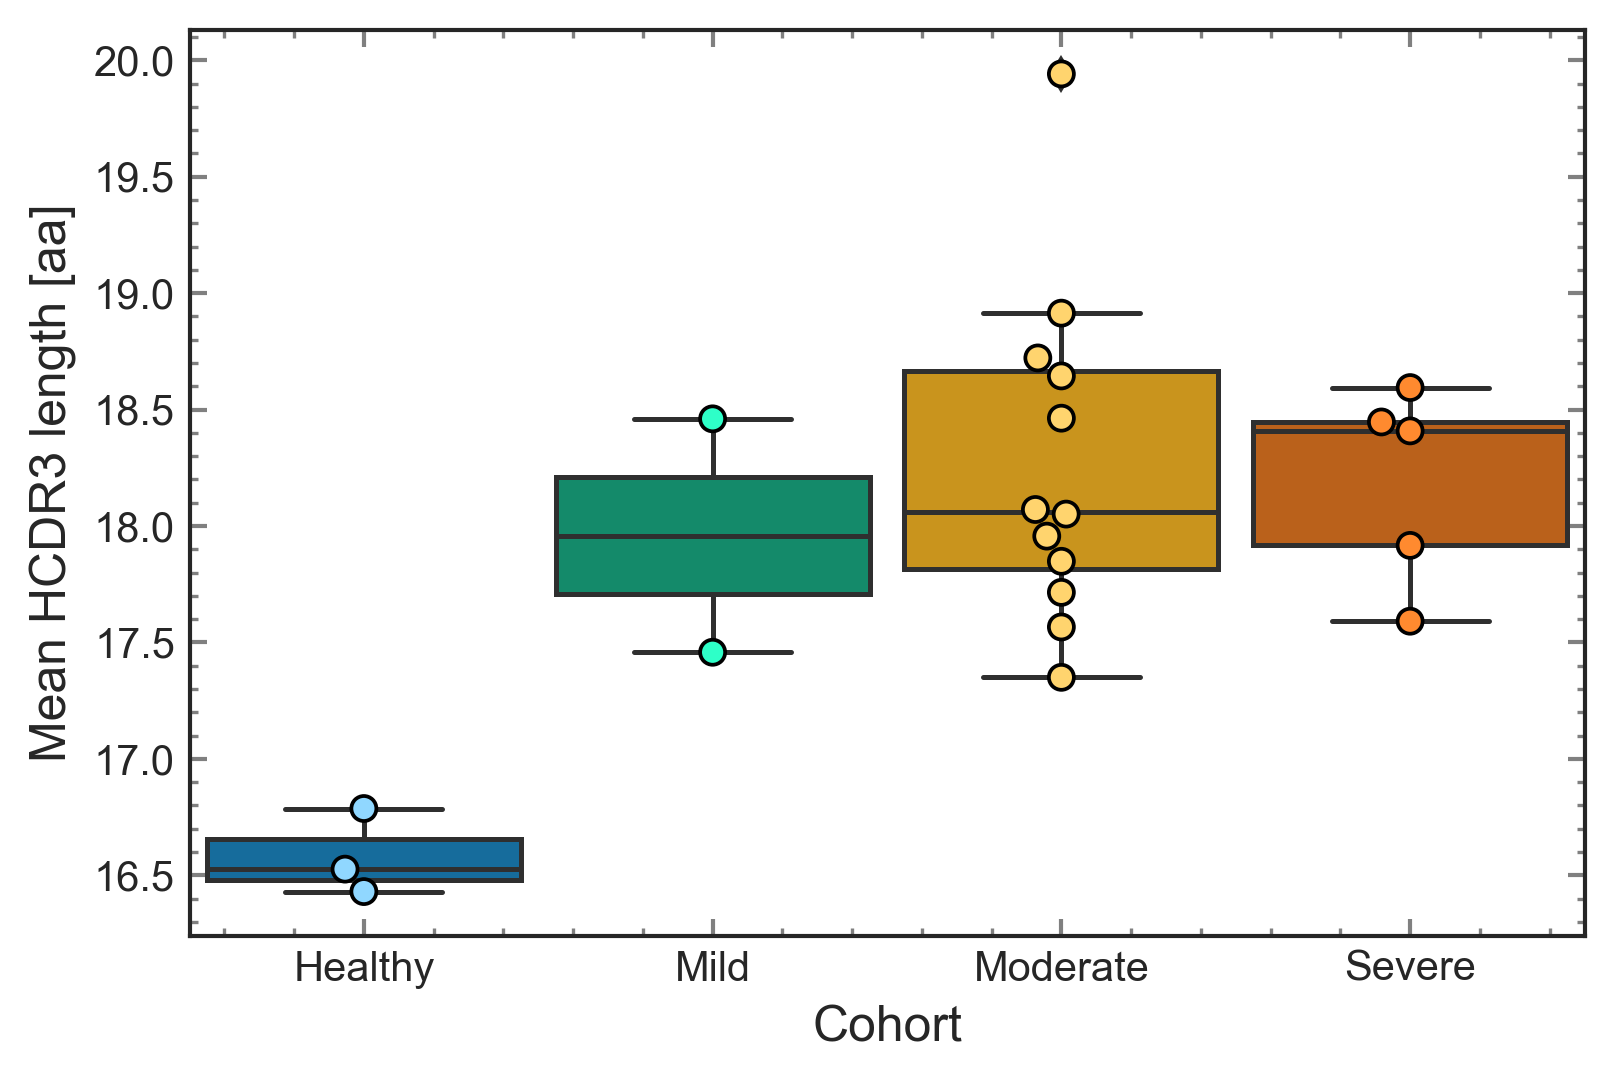

vd ins
Healthy vs. Mild: F_{1,3} = 3.66, p-value = 0.152
Healthy vs. Moderate: F_{1,13} = 10.0, p-value = 0.0074
Healthy vs. Severe: F_{1,6} = 8.19, p-value = 0.0287


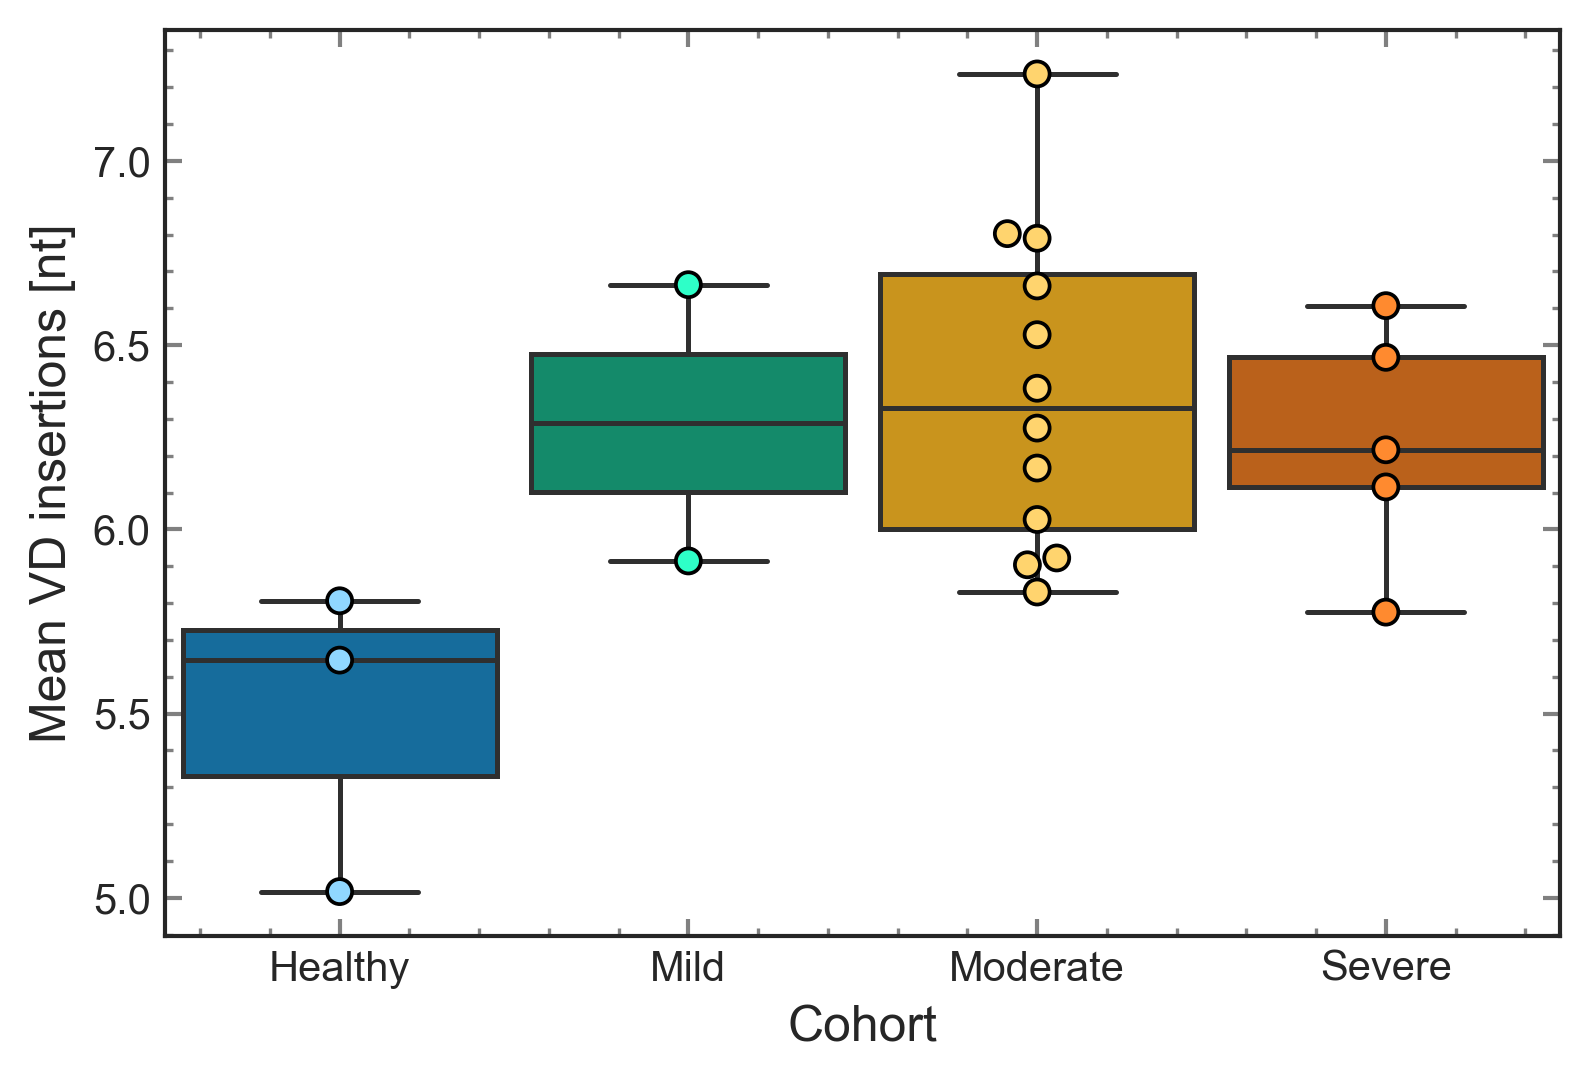

dj ins
Healthy vs. Mild: F_{1,3} = 48.9, p-value = 0.00601
Healthy vs. Moderate: F_{1,13} = 12.4, p-value = 0.00373
Healthy vs. Severe: F_{1,6} = 17.4, p-value = 0.00585


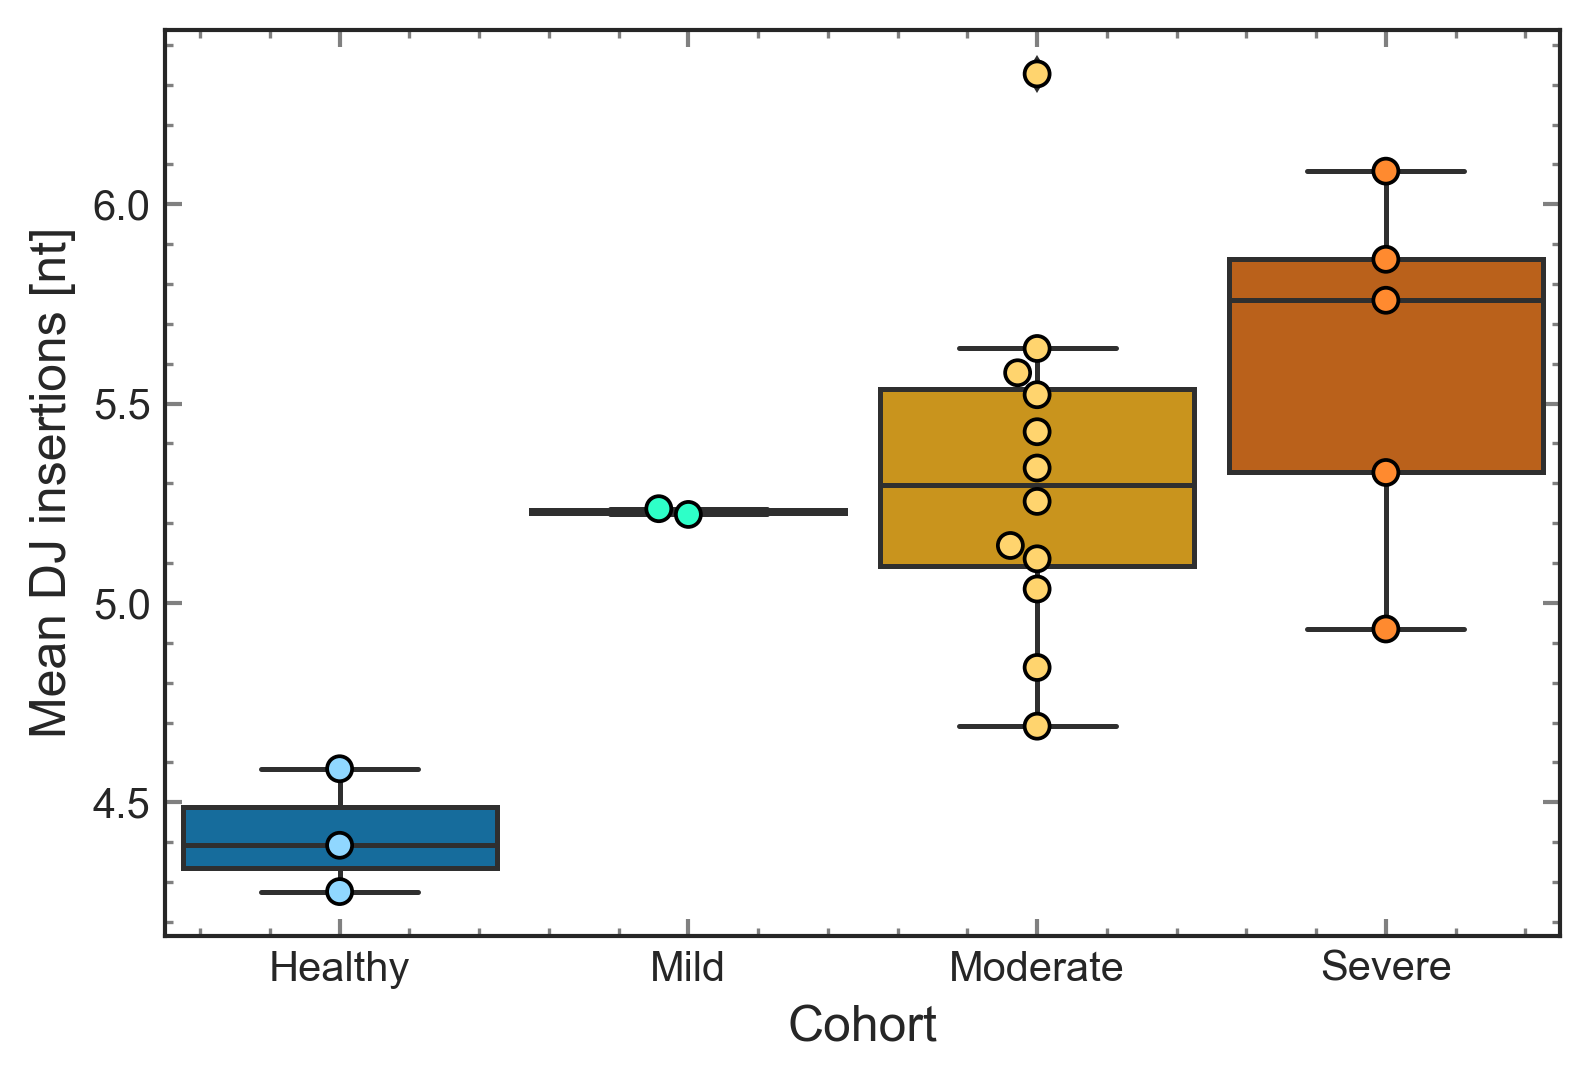

vd del
Healthy vs. Mild: F_{1,3} = 4.2, p-value = 0.133
Healthy vs. Moderate: F_{1,13} = 12.4, p-value = 0.00374
Healthy vs. Severe: F_{1,6} = 18.9, p-value = 0.00481


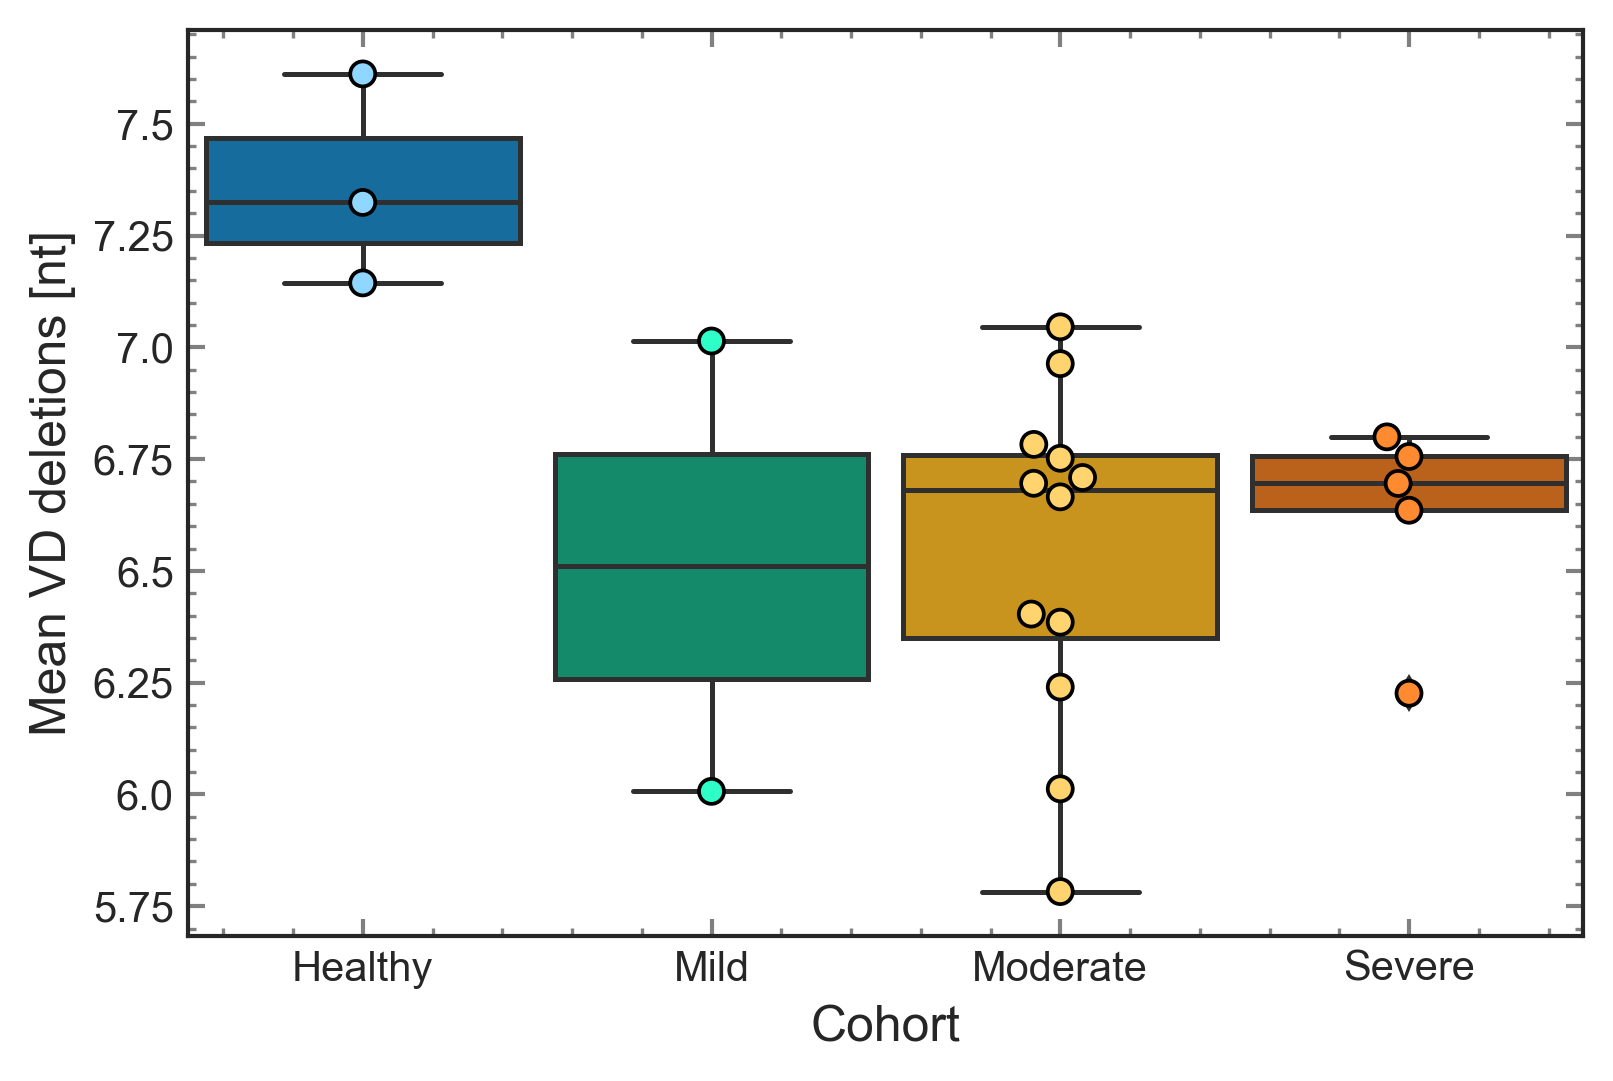

dj del
Healthy vs. Mild: F_{1,3} = 3.87, p-value = 0.144
Healthy vs. Moderate: F_{1,13} = 10.8, p-value = 0.00594
Healthy vs. Severe: F_{1,6} = 5.09, p-value = 0.0648


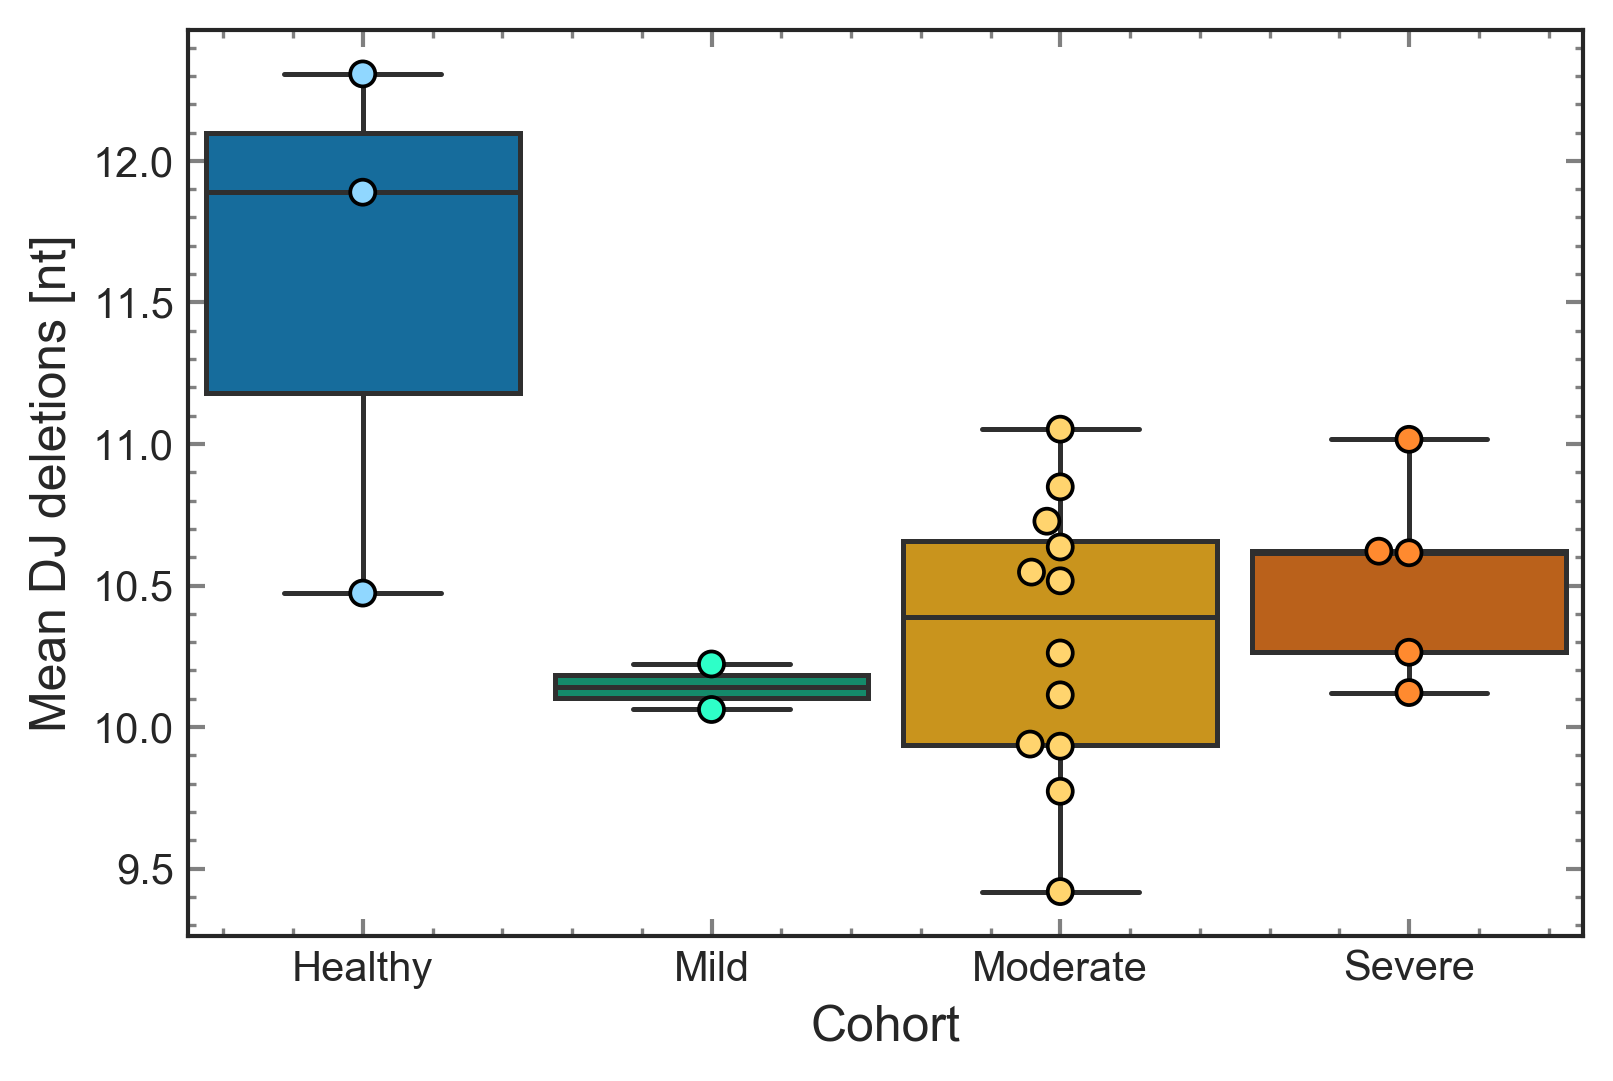

In [9]:
for observable in progenitor_data['Healthy']:
    if 'gene' in observable:
        continue
    print(observable)
    perform_anova(progenitor_data, observable)

cdr3 length
Healthy vs. Mild: F_{1,3} = 8.67, p-value = 0.0603
Healthy vs. Moderate: F_{1,13} = 17.2, p-value = 0.00114
Healthy vs. Severe: F_{1,6} = 9.99, p-value = 0.0196


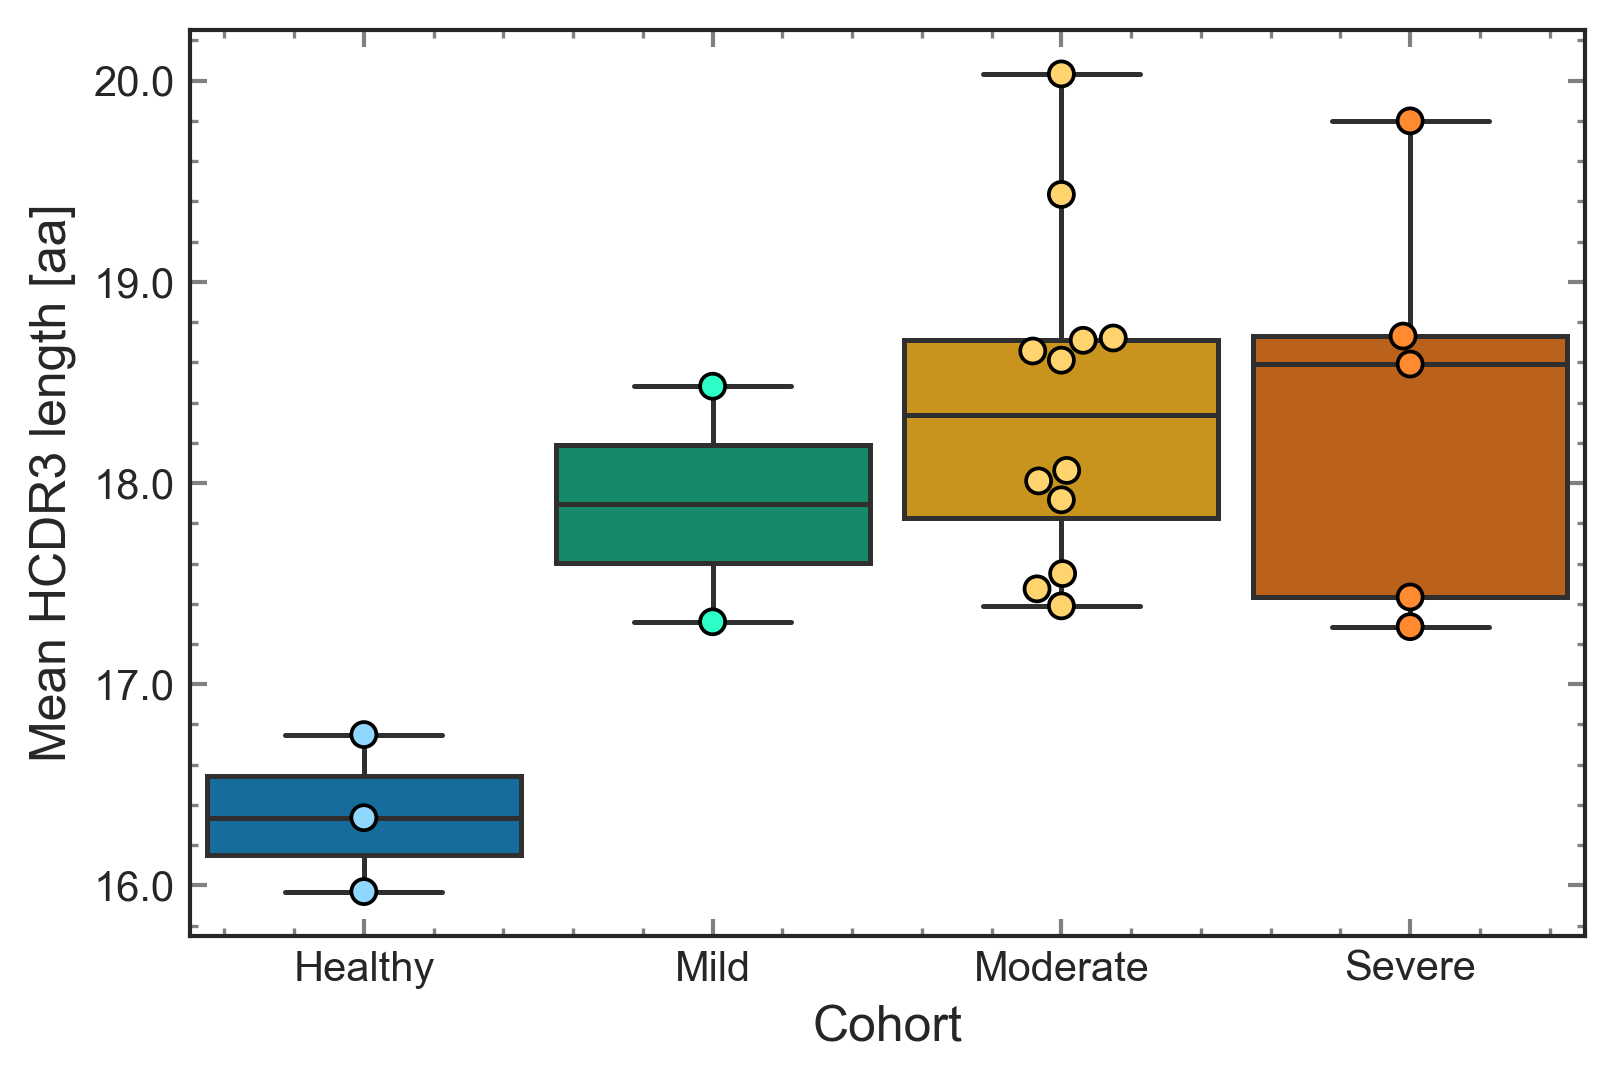

vd ins
Healthy vs. Mild: F_{1,3} = 2.12, p-value = 0.241
Healthy vs. Moderate: F_{1,13} = 10.1, p-value = 0.0072
Healthy vs. Severe: F_{1,6} = 4.34, p-value = 0.0822


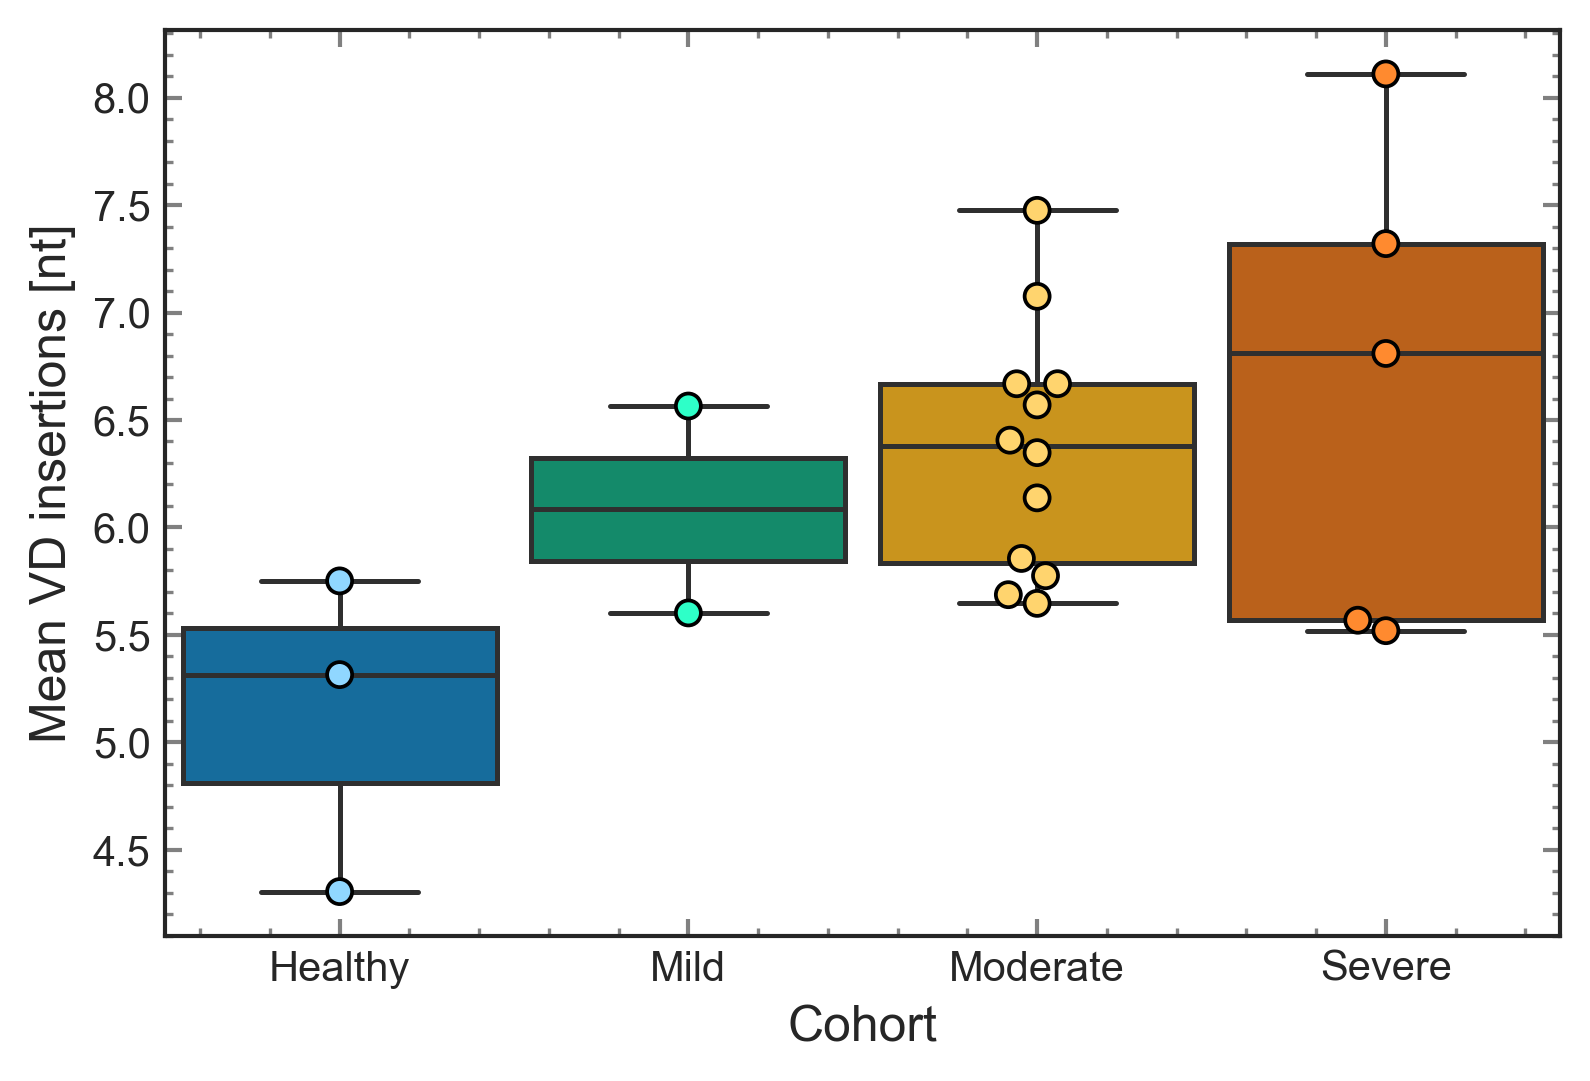

dj ins
Healthy vs. Mild: F_{1,3} = 15.3, p-value = 0.0296
Healthy vs. Moderate: F_{1,13} = 6.24, p-value = 0.0267
Healthy vs. Severe: F_{1,6} = 9.58, p-value = 0.0212


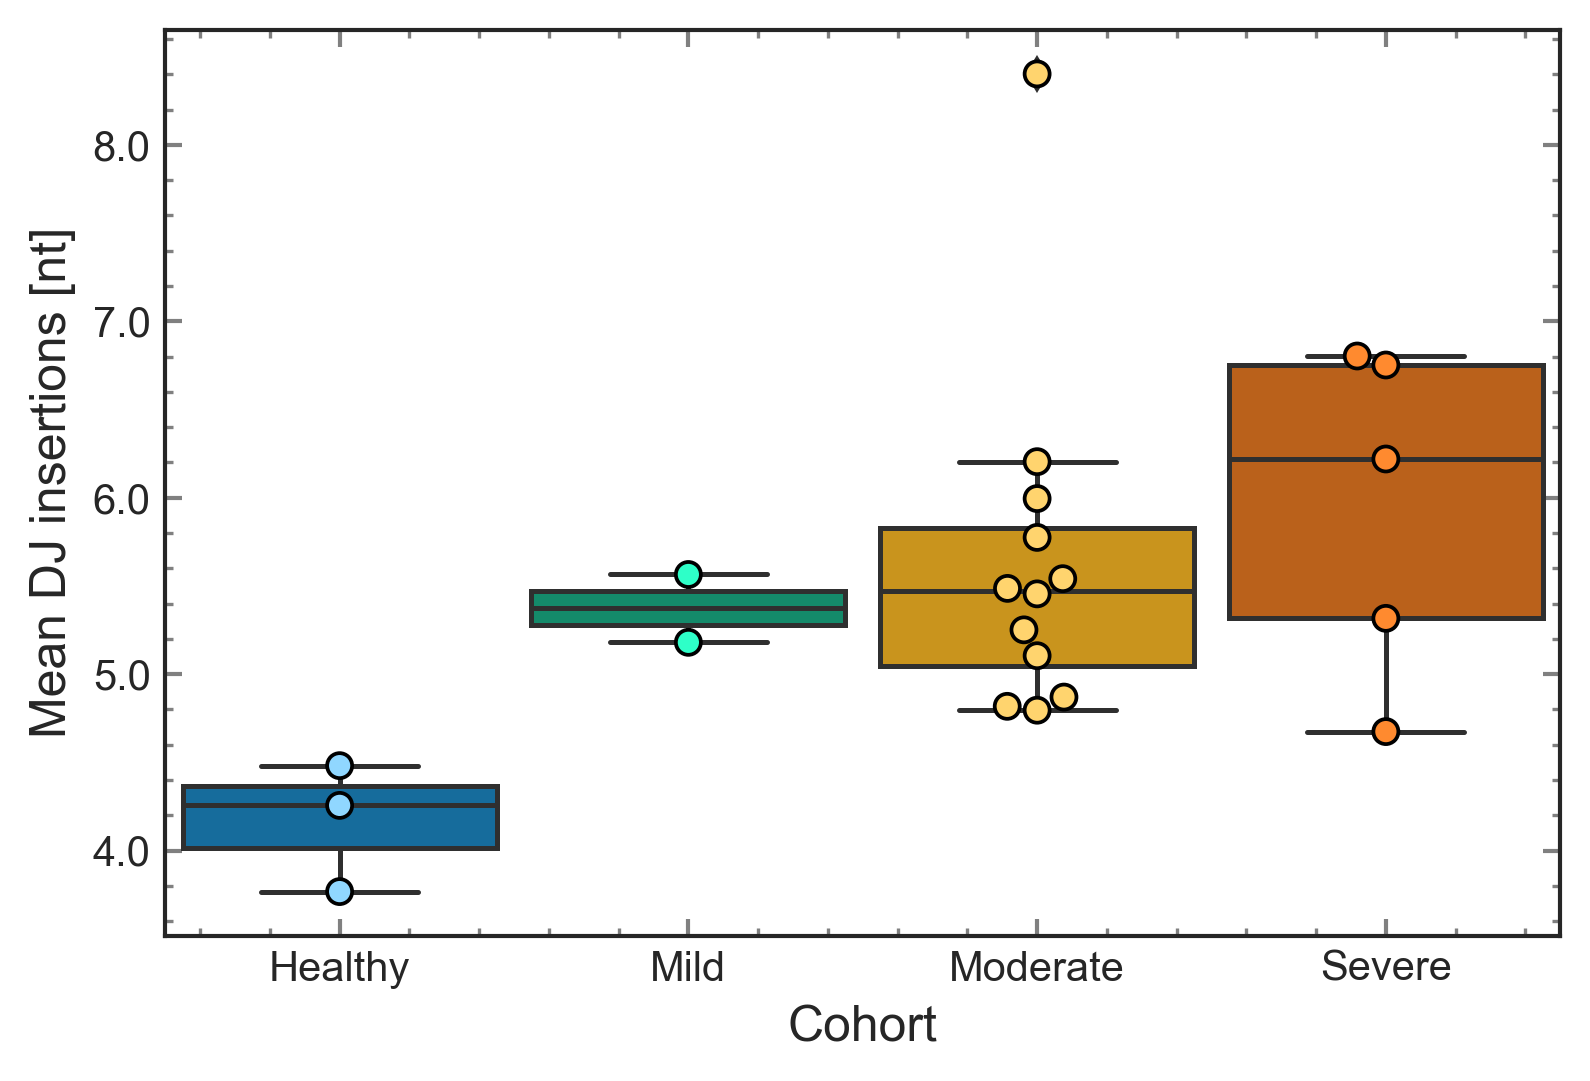

vd del
Healthy vs. Mild: F_{1,3} = 1.66, p-value = 0.288
Healthy vs. Moderate: F_{1,13} = 9.53, p-value = 0.00865
Healthy vs. Severe: F_{1,6} = 4.53, p-value = 0.0774


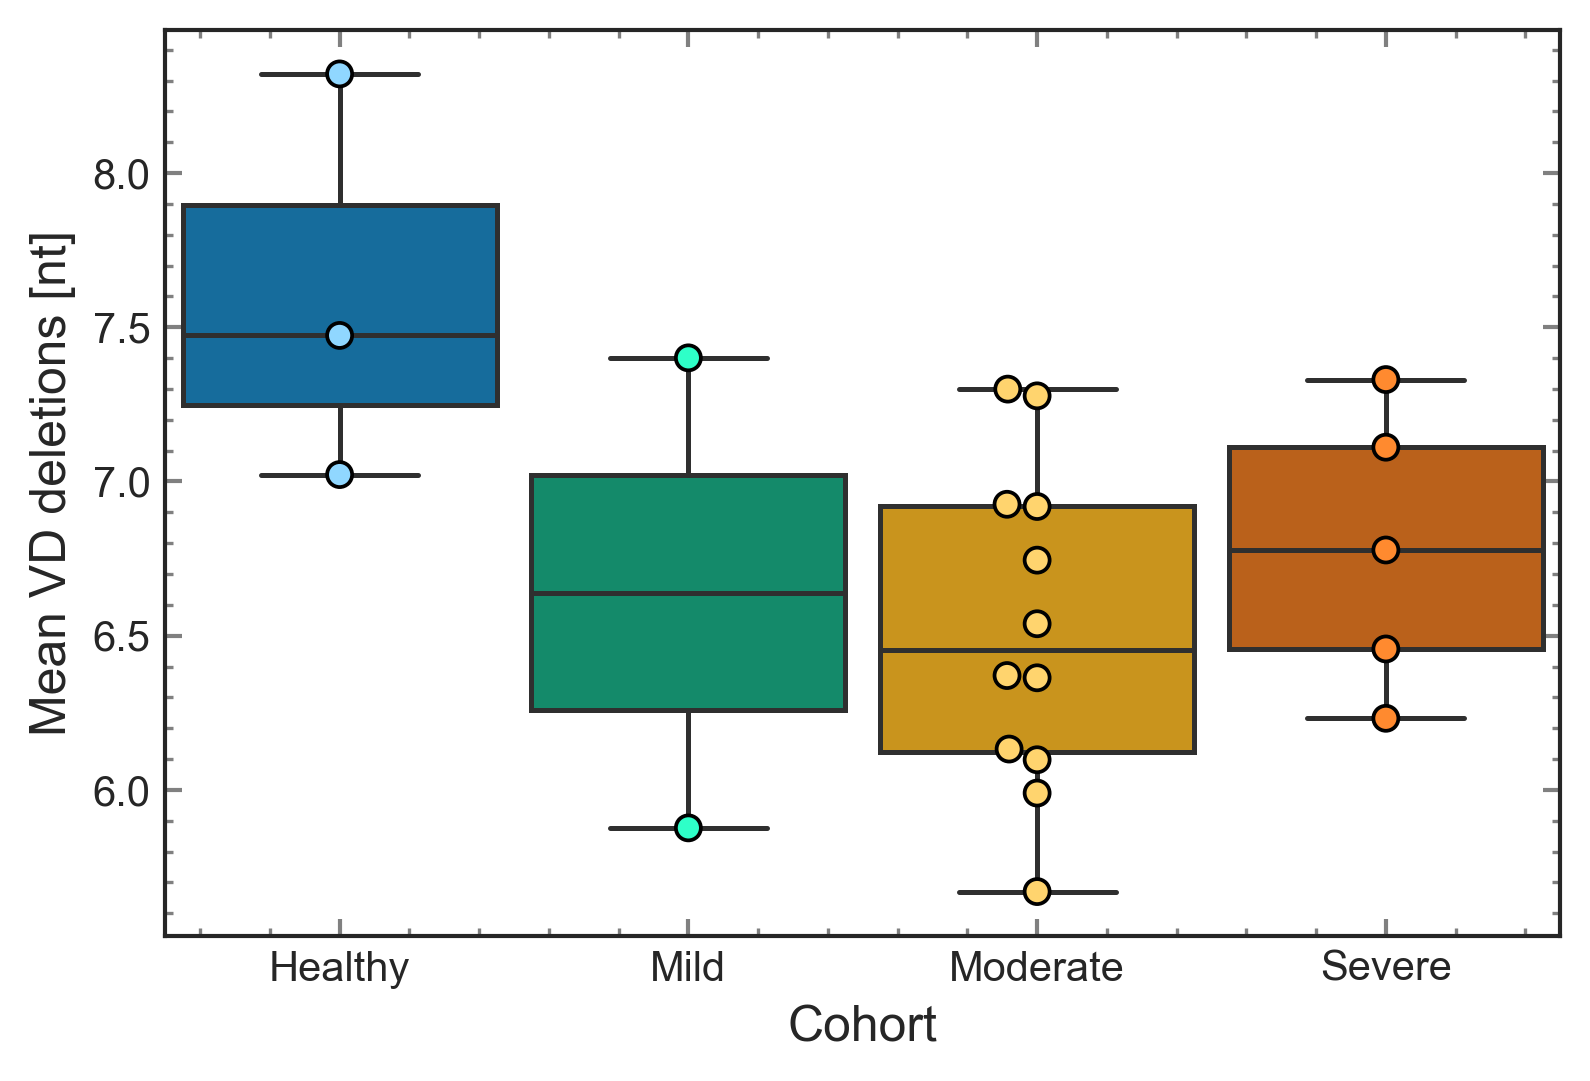

dj del
Healthy vs. Mild: F_{1,3} = 4.79, p-value = 0.116
Healthy vs. Moderate: F_{1,13} = 4.63, p-value = 0.0507
Healthy vs. Severe: F_{1,6} = 0.51, p-value = 0.502


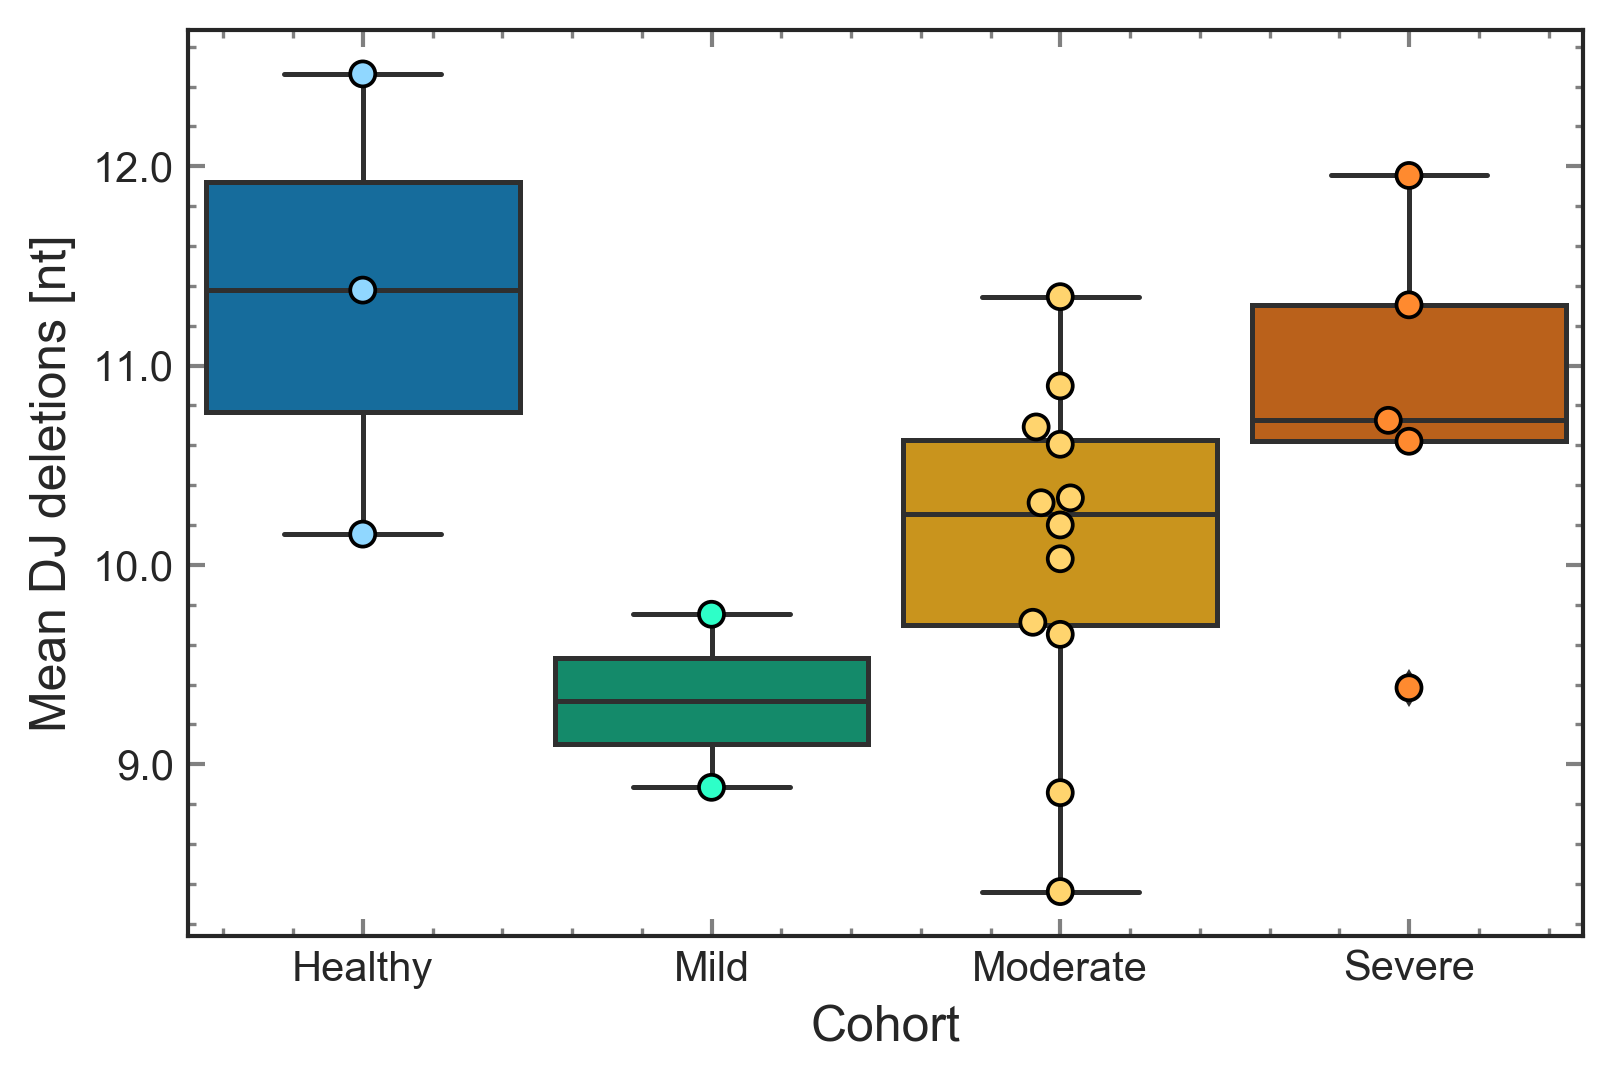

In [10]:
for observable in nonsingleton_data['Healthy']:
    if 'gene' in observable:
        continue
    print(observable)
    perform_anova(nonsingleton_data, observable)

In [11]:
for observable in progenitor_data['Healthy']:
    if 'gene' in observable:
        continue
    print(observable)
    perform_ks2samp(progenitor_data, observable)
    print()

cdr3 length
Healthy vs. Mild: D_{1918,5581} = 0.162, p value = 1.0
Healthy vs. Moderate: D_{1918,33069} = 0.195, p value = 5.389999999999999e-60
Healthy vs. Severe: D_{1918,8313} = 0.179, p value = 1.0

vd ins
Healthy vs. Mild: D_{1918,5581} = 0.0906, p value = 1.0
Healthy vs. Moderate: D_{1918,33069} = 0.0894, p value = 5.09e-13
Healthy vs. Severe: D_{1918,8313} = 0.0784, p value = 1.0

dj ins
Healthy vs. Mild: D_{1918,5581} = 0.0928, p value = 1.0
Healthy vs. Moderate: D_{1918,33069} = 0.0933, p value = 3.83e-14
Healthy vs. Severe: D_{1918,8313} = 0.109, p value = 1.0

vd del
Healthy vs. Mild: D_{1918,5581} = 0.0631, p value = 1.0
Healthy vs. Moderate: D_{1918,33069} = 0.0786, p value = 3.7e-10
Healthy vs. Severe: D_{1918,8313} = 0.0701, p value = 1.0

dj del
Healthy vs. Mild: D_{1918,5581} = 0.0831, p value = 1.0
Healthy vs. Moderate: D_{1918,33069} = 0.0677, p value = 1.19e-07
Healthy vs. Severe: D_{1918,8313} = 0.0596, p value = 1.0



In [12]:
for observable in nonsingleton_data['Healthy']:
    if 'gene' in observable:
        continue
    print(observable)
    perform_ks2samp(nonsingleton_data, observable)
    print()

cdr3 length
Healthy vs. Mild: D_{5981,22826} = 0.16, p value = 1.0299999999999993e-105
Healthy vs. Moderate: D_{5981,132283} = 0.226, p value = 7.11e-254
Healthy vs. Severe: D_{5981,42299} = 0.243, p value = 1.0299999999999998e-268

vd ins
Healthy vs. Mild: D_{5981,22826} = 0.108, p value = 4.7999999999999994e-48
Healthy vs. Moderate: D_{5981,132283} = 0.136, p value = 1.0599999999999993e-92
Healthy vs. Severe: D_{5981,42299} = 0.175, p value = 1.2999999999999993e-139

dj ins
Healthy vs. Mild: D_{5981,22826} = 0.131, p value = 7.469999999999999e-71
Healthy vs. Moderate: D_{5981,132283} = 0.131, p value = 1.0399999999999996e-85
Healthy vs. Severe: D_{5981,42299} = 0.215, p value = 1.3499999999999996e-210

vd del
Healthy vs. Mild: D_{5981,22826} = 0.0758, p value = 4.5000000000000005e-24
Healthy vs. Moderate: D_{5981,132283} = 0.11, p value = 1.1299999999999998e-60
Healthy vs. Severe: D_{5981,42299} = 0.0913, p value = 2.3500000000000005e-38

dj del
Healthy vs. Mild: D_{5981,22826} = 0.1

# plasmblast sequence features

In [13]:
progenitor_data, progenitor_averages = get_stats(files,rep_type='plasmablast')
nonsingleton_data, nonsingleton_averages = get_stats(files,rep_type='plasmablast',statstype='nonsingletons')

In [14]:
dict_plas_prog_cdr3 = {'severity': [], 'mean_cdr3': [], 'type': []}
dict_plas_nonsing_cdr3 = {'severity': [], 'mean_cdr3': [], 'type': []}
for severity in progenitor_data:
    for cdr3_data in progenitor_data[severity]['cdr3 length']:
        dict_plas_prog_cdr3['severity'].append(severity)
        dict_plas_prog_cdr3['mean_cdr3'].append(np.mean(cdr3_data))
        dict_plas_prog_cdr3['type'].append('plasma')
for severity in nonsingleton_data:
    for cdr3_data in nonsingleton_data[severity]['cdr3 length']:
        dict_plas_nonsing_cdr3['severity'].append(severity)
        dict_plas_nonsing_cdr3['mean_cdr3'].append(np.mean(cdr3_data))
        dict_plas_nonsing_cdr3['type'].append('plasma') 
df_prog_cdr3_means = pd.concat([df_bulk_prog_cdr3_means, pd.DataFrame(dict_plas_prog_cdr3)])
df_nonsing_cdr3_means = pd.concat([df_bulk_nonsing_cdr3_means, pd.DataFrame(dict_plas_nonsing_cdr3)])

In [15]:
df_prog_cdr3_means

severity  mean_cdr3    type
0        Healthy  16.430177    bulk
1        Healthy  16.786925    bulk
2        Healthy  16.526652    bulk
3           Mild  17.457998    bulk
4           Mild  18.460388    bulk
5       Moderate  18.644628    bulk
6       Moderate  17.848609    bulk
7       Moderate  18.071038    bulk
8       Moderate  18.721927    bulk
9       Moderate  17.566537    bulk
10      Moderate  18.914226    bulk
11      Moderate  18.051327    bulk
12      Moderate  17.350274    bulk
13      Moderate  17.956657    bulk
14      Moderate  19.941551    bulk
15      Moderate  17.715127    bulk
16      Moderate  18.463175    bulk
17        Severe  18.446934    bulk
18        Severe  18.594650    bulk
19        Severe  17.591295    bulk
20        Severe  17.916900    bulk
21        Severe  18.408593    bulk
0        Healthy  16.683333  plasma
1        Healthy  17.298969  plasma
2        Healthy  17.031579  plasma
3           Mild  17.000000  plasma
4           Mild  17.485366  plasma
5           Mild  18.230380  plasma
6       Moderate  18.834087  plasma
7       Moderate  17.893805  plasma
8       Moderate  17.715746  plasma
9       Moderate  17.328467  plasma
10      Moderate  17.760108  plasma
11      Moderate  17.322034  plasma
12      Moderate  17.460000  plasma
13      Moderate  16.912162  plasma
14      Moderate  18.479734  plasma
15        Severe  17.459752  plasma
16  Asymptomatic  18.315385  plasma
17  Asymptomatic  17.977528  plasma

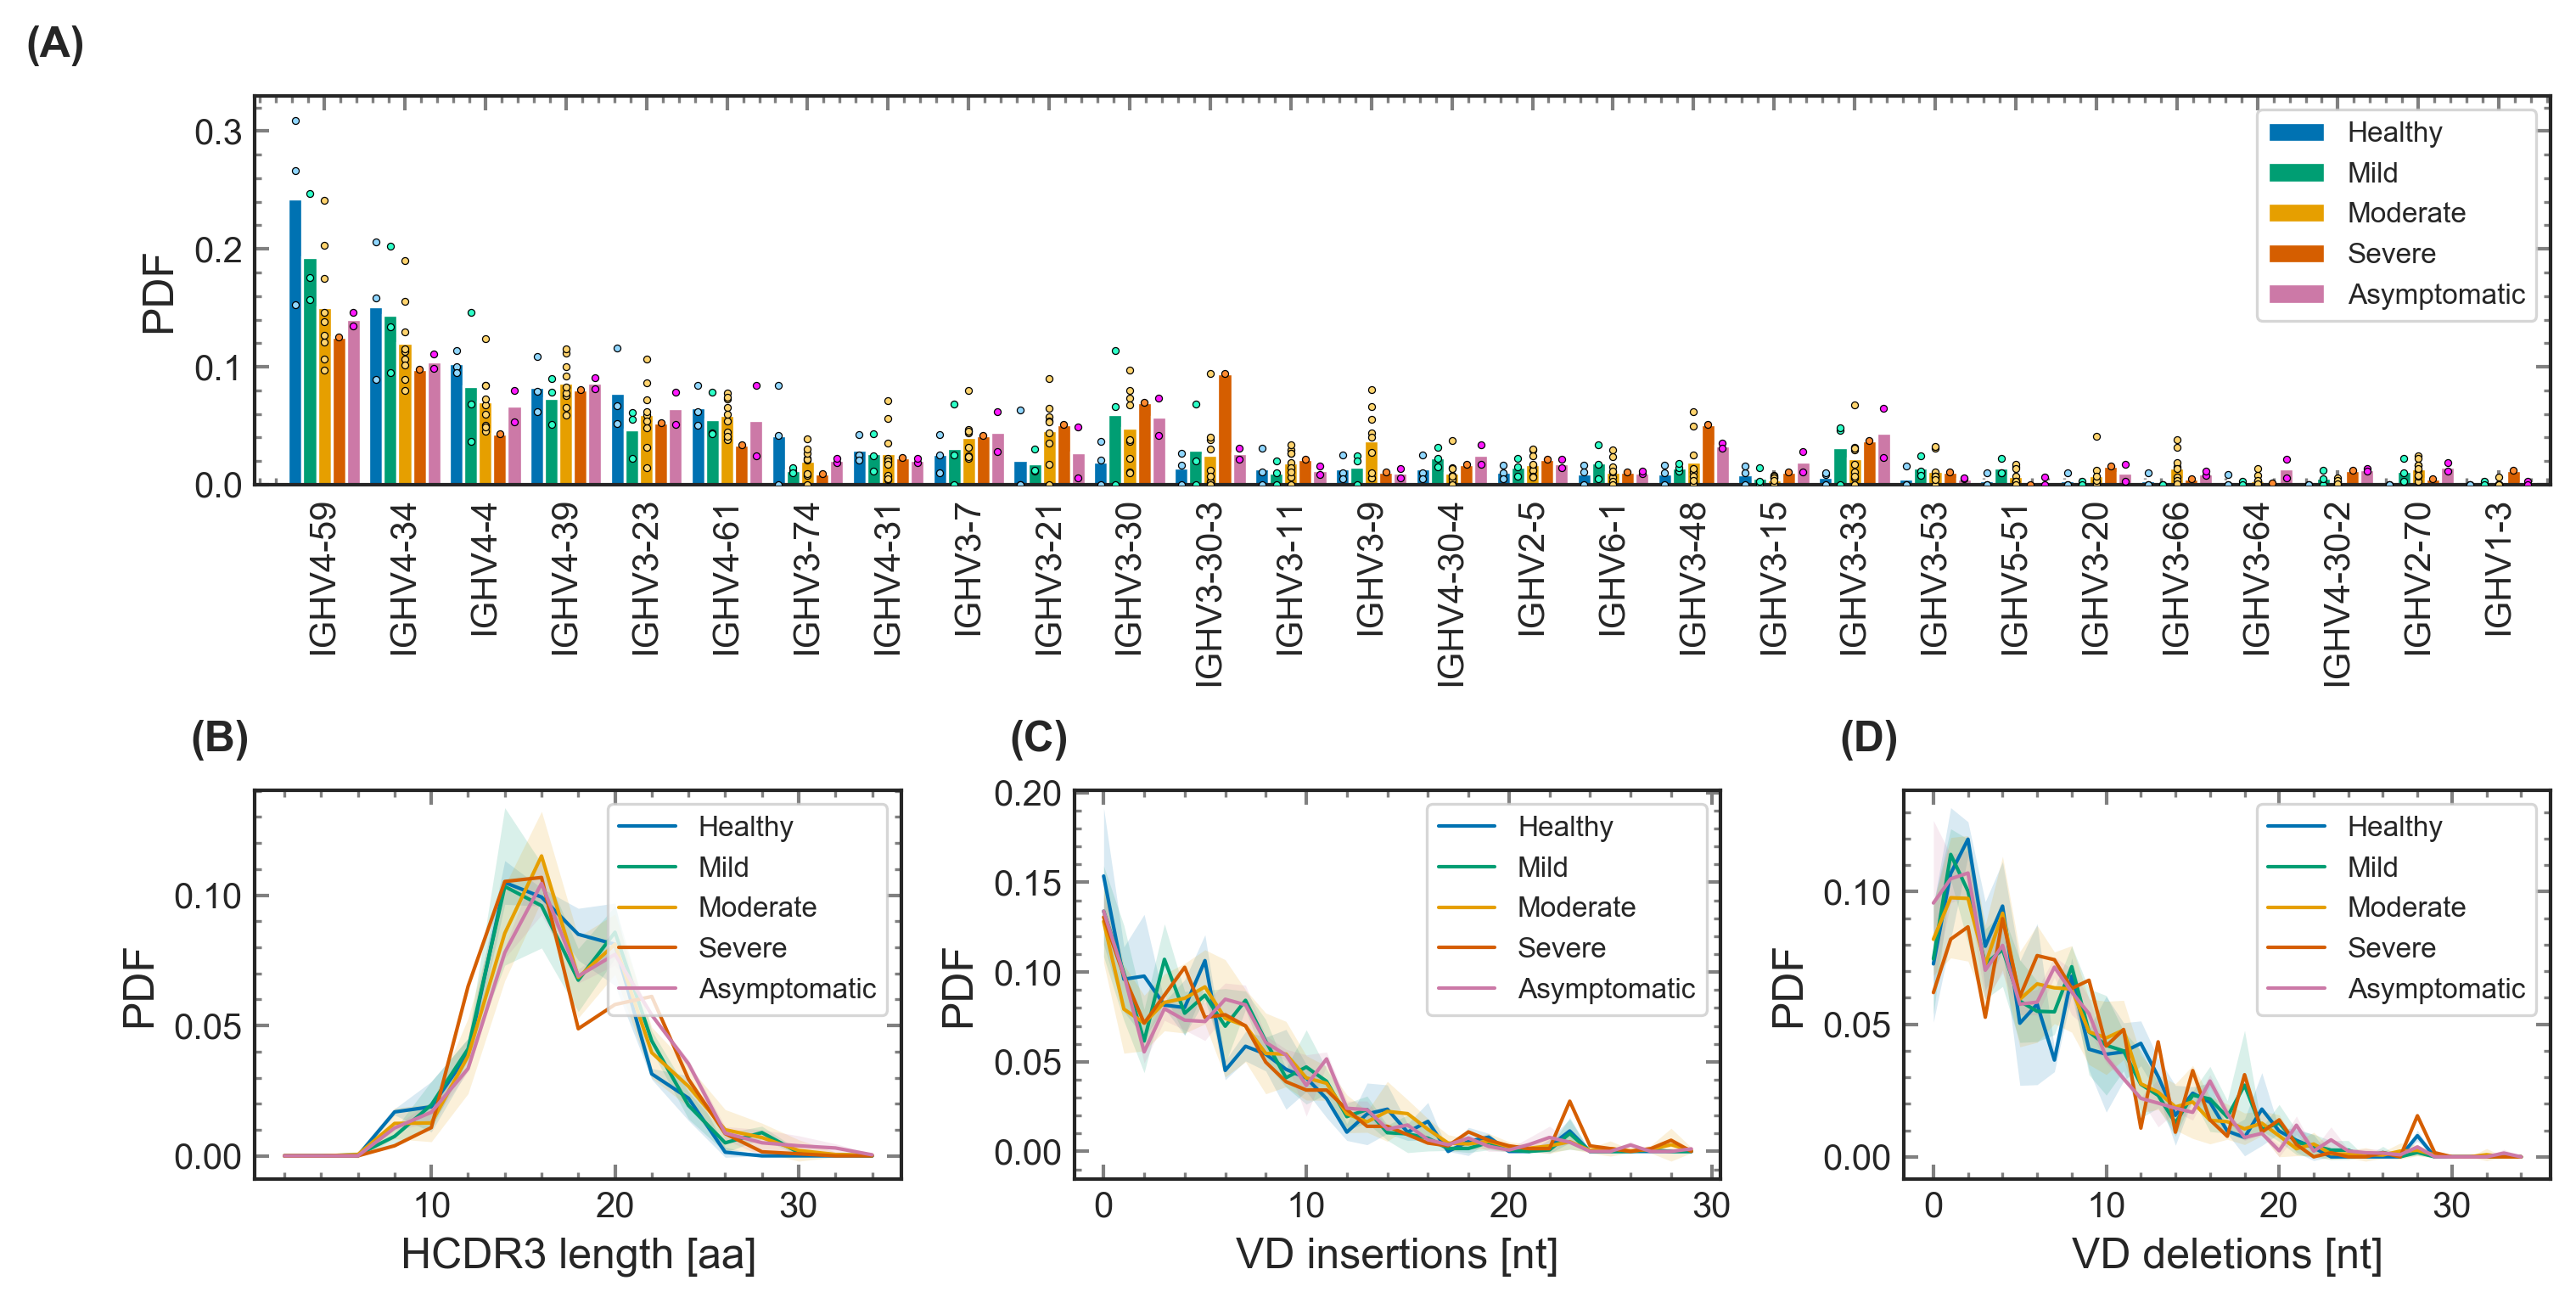

In [16]:
sns.set(context='paper', style='white')
fig = plt.figure(dpi=global_dpi,figsize=(10,5),constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=3, wspace=0.025, hspace=0.05)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[1, 2])
cohort_bar(progenitor_averages, progenitor_data,'v gene',
           ax=ax0, yaxis_upper=0.33, labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(progenitor_averages, 'cdr3 length', ax1, labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(progenitor_averages, 'vd ins', ax2, labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(progenitor_averages, 'vd del', ax3, labelsize=12, ticksize=10, legendsize=8)
for n, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.text(-0.1, 1.1, "("+string.ascii_uppercase[n]+")", transform=ax.transAxes, 
            size=12, weight='bold')
fig.savefig('/usr/lusers/zacmon/covid_figures/FigS2_new.pdf',bbox_inches='tight')
fig.savefig('/usr/lusers/zacmon/covid_figures/FigS2_new.png',bbox_inches='tight')

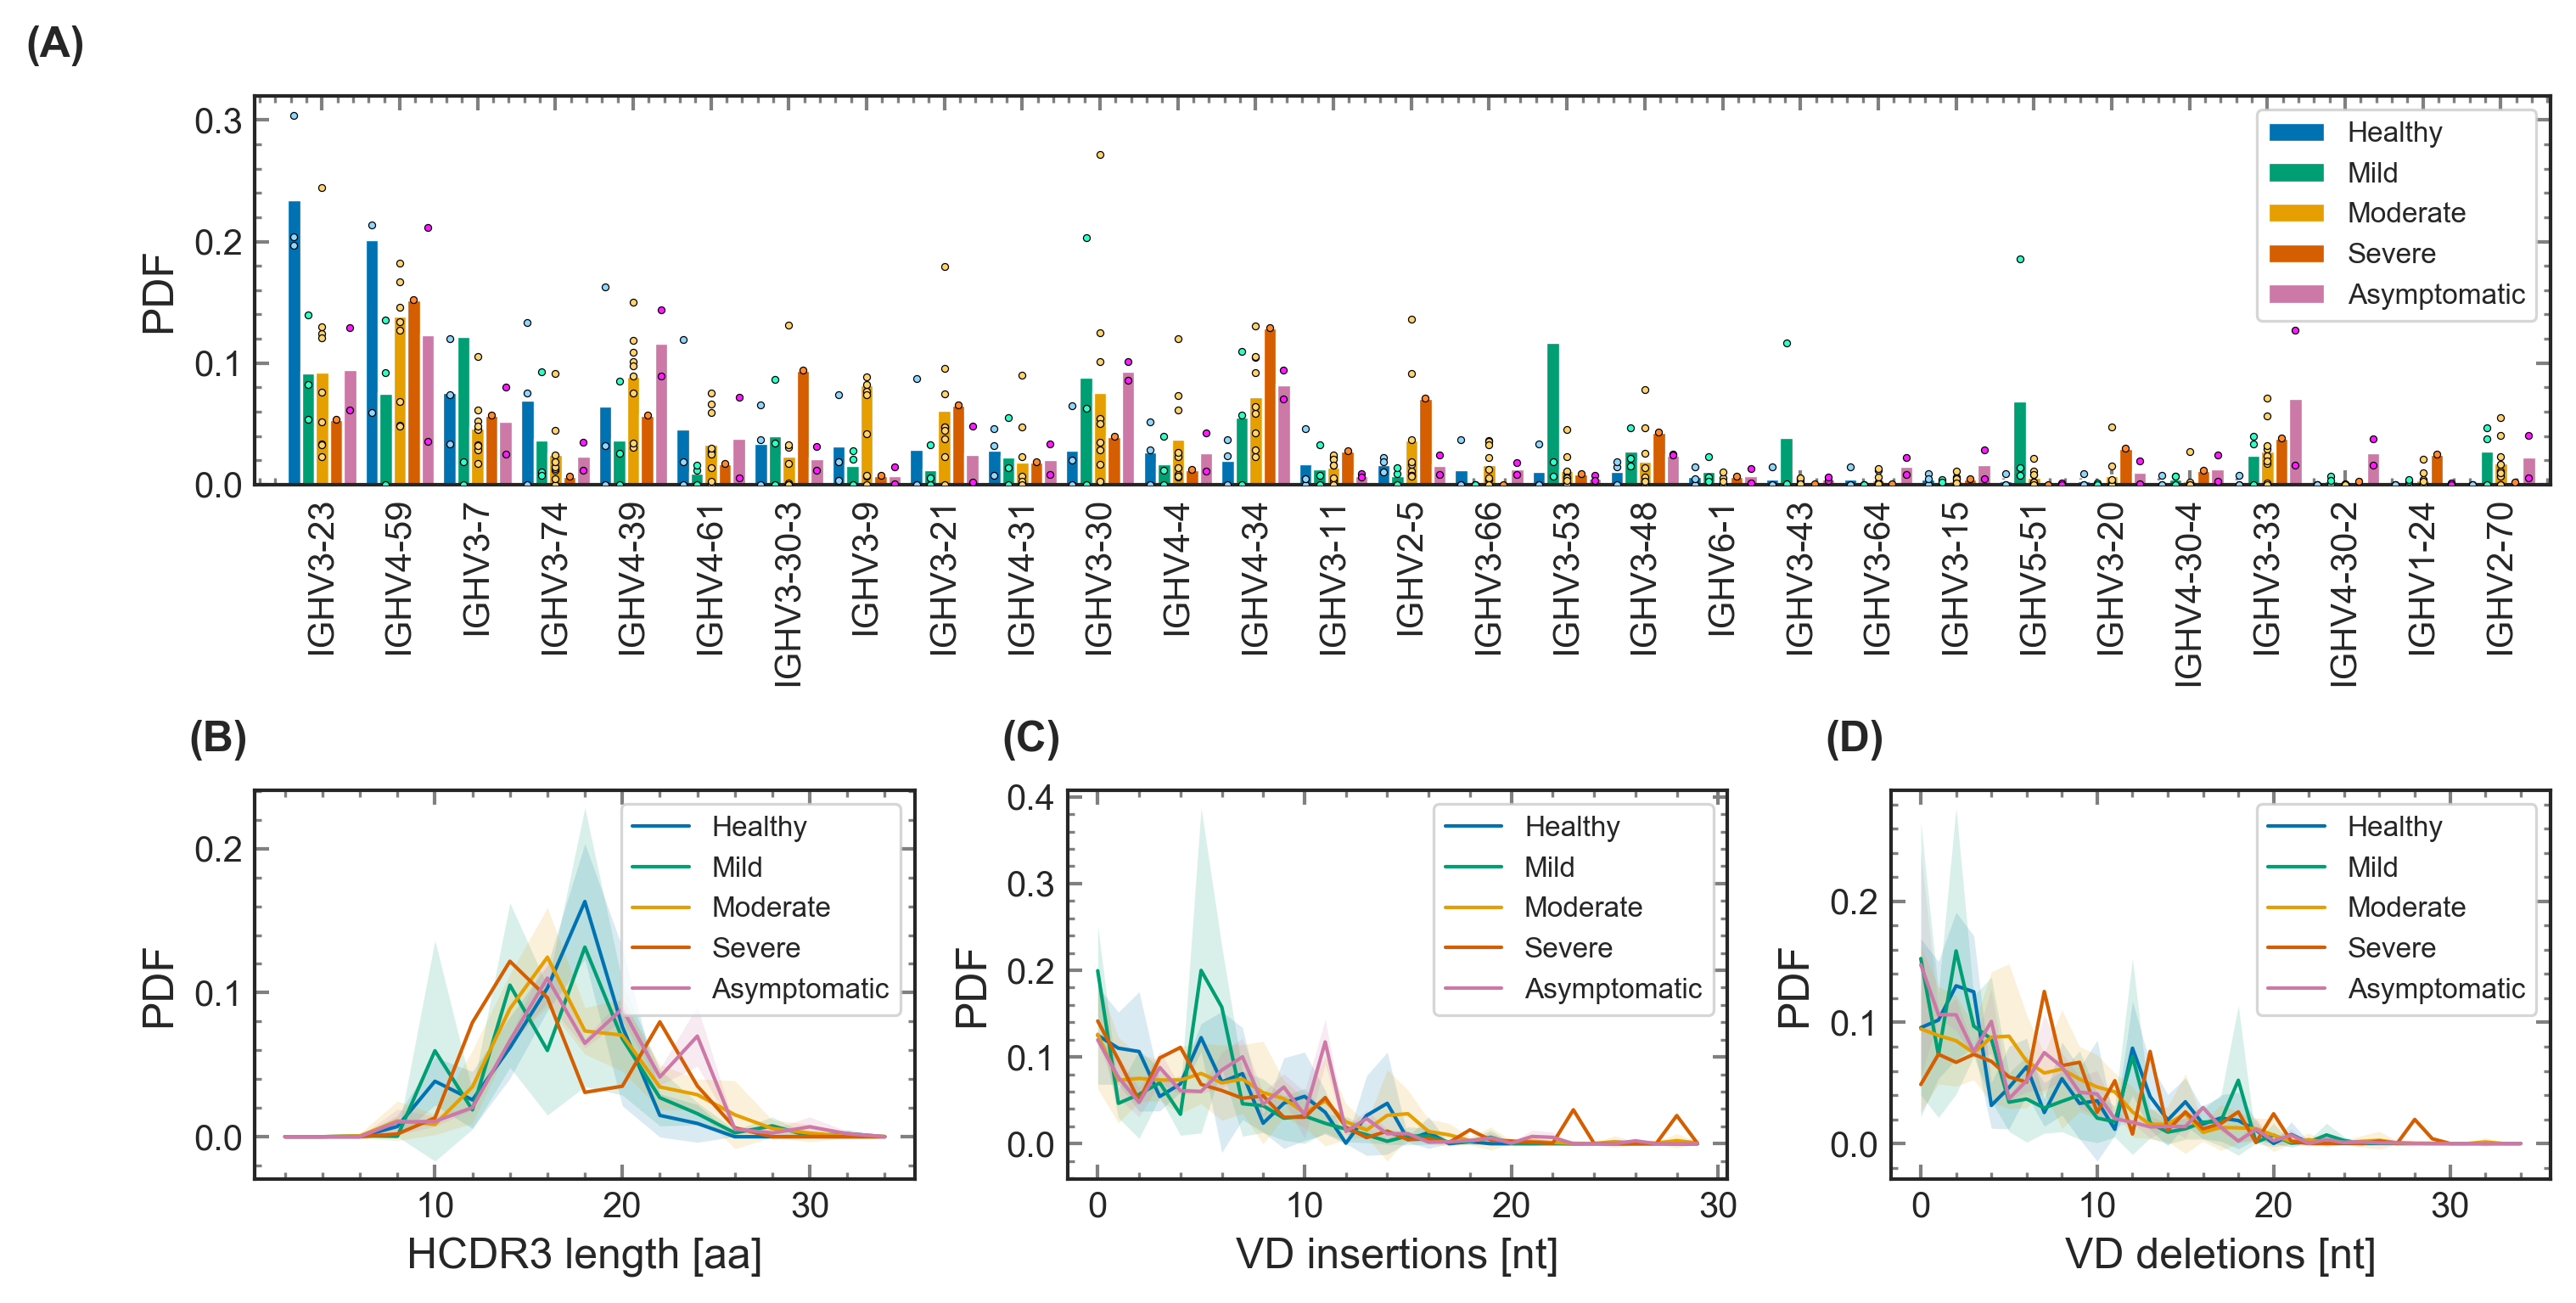

In [17]:
sns.set(context='paper', style='white')
fig = plt.figure(dpi=global_dpi,figsize=(10,5),constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=3, wspace=0.025, hspace=0.05)
ax0 = fig.add_subplot(gs[:-1, :])
ax1 = fig.add_subplot(gs[-1, 0])
ax2 = fig.add_subplot(gs[-1, 1])
ax3 = fig.add_subplot(gs[-1, -1])
cohort_bar(nonsingleton_averages, nonsingleton_data,'v gene',
           ax=ax0, yaxis_upper=0.32, labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(nonsingleton_averages, 'cdr3 length', ax1, labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(nonsingleton_averages, 'vd ins', ax2, labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(nonsingleton_averages, 'vd del', ax3, labelsize=12, ticksize=10, legendsize=8)
for n, ax in enumerate([ax0, ax1, ax2, ax3]):
    ax.text(-0.1, 1.1, "("+string.ascii_uppercase[n]+")", transform=ax.transAxes, 
            size=12, weight='bold')
fig.savefig('/usr/lusers/zacmon/covid_figures/FigS5_new.pdf',bbox_inches='tight')
fig.savefig('/usr/lusers/zacmon/covid_figures/FigS5_new.png',bbox_inches='tight')

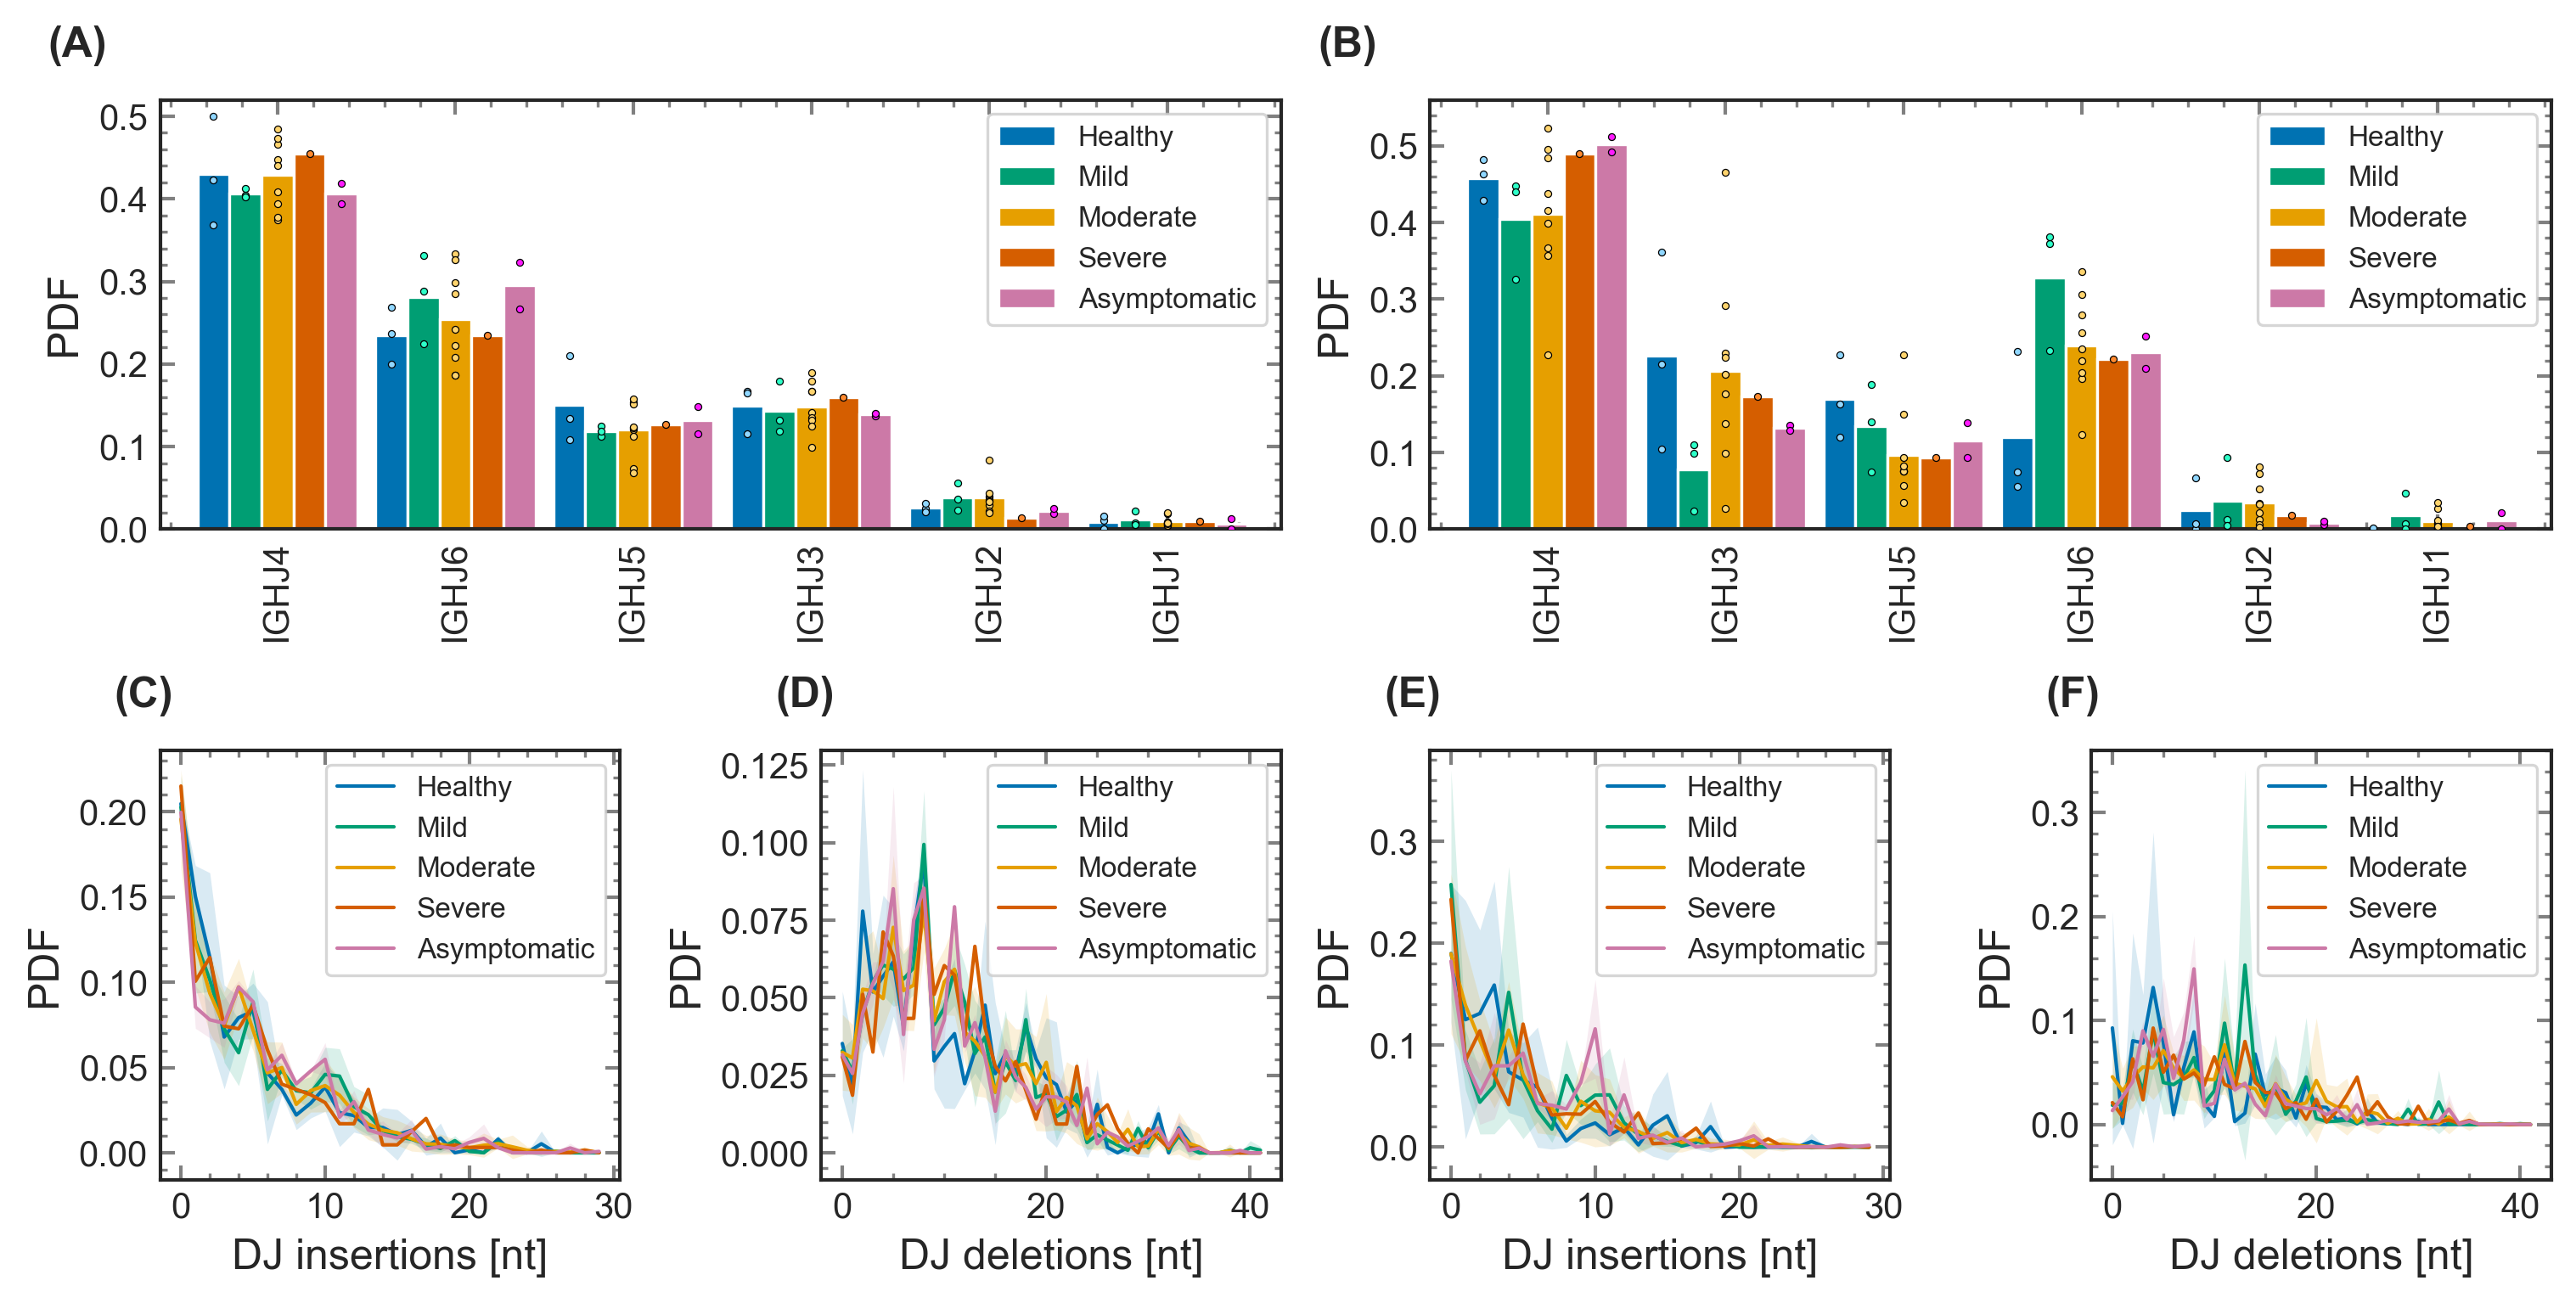

In [18]:
fig = plt.figure(dpi=global_dpi,figsize=(10,5), constrained_layout=True)
gs = fig.add_gridspec(nrows=2, ncols=4, wspace=0.025, hspace=0.05)
jax0 = fig.add_subplot(gs[0, 0:2])
jax1 = fig.add_subplot(gs[0, 2:4])
jax2 = fig.add_subplot(gs[1, 0])
jax3 = fig.add_subplot(gs[1, 1])
jax4 = fig.add_subplot(gs[1, 2])
jax5 = fig.add_subplot(gs[1, 3])
cohort_bar(progenitor_averages, progenitor_data, 'j gene',
           ax=jax0,yaxis_upper=0.52, labelsize=12, ticksize=10, legendsize=8)
cohort_bar(nonsingleton_averages, nonsingleton_data,'j gene',
           ax=jax1,yaxis_upper=0.56, labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(progenitor_averages, 'dj ins', jax2,
                labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(progenitor_averages, 'dj del', jax3,
                labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(nonsingleton_averages, 'dj ins', jax4,
                labelsize=12, ticksize=10, legendsize=8)
make_stats_plot(nonsingleton_averages, 'dj del', jax5,
                labelsize=12, ticksize=10, legendsize=8)
for n, ax in enumerate([jax0, jax1, jax2, jax3, jax4, jax5]):
    ax.text(-0.1, 1.1, "("+string.ascii_uppercase[n]+")", transform=ax.transAxes, 
            size=12, weight='bold')
sns.set(context='paper', style='white')
fig.savefig('/usr/lusers/zacmon/covid_figures/FigS3_new.pdf',bbox_inches='tight')
fig.savefig('/usr/lusers/zacmon/covid_figures/FigS3_new.png',bbox_inches='tight')

cdr3 length
Healthy vs. Mild: F_{1,4} = 2.01, p-value = 0.229
Healthy vs. Moderate: F_{1,10} = 4.02, p-value = 0.0727
Healthy vs. Severe: F_{1,2} = 1.63, p-value = 0.33
Healthy vs. Asymptomatic: F_{1,3} = 19.0, p-value = 0.0224


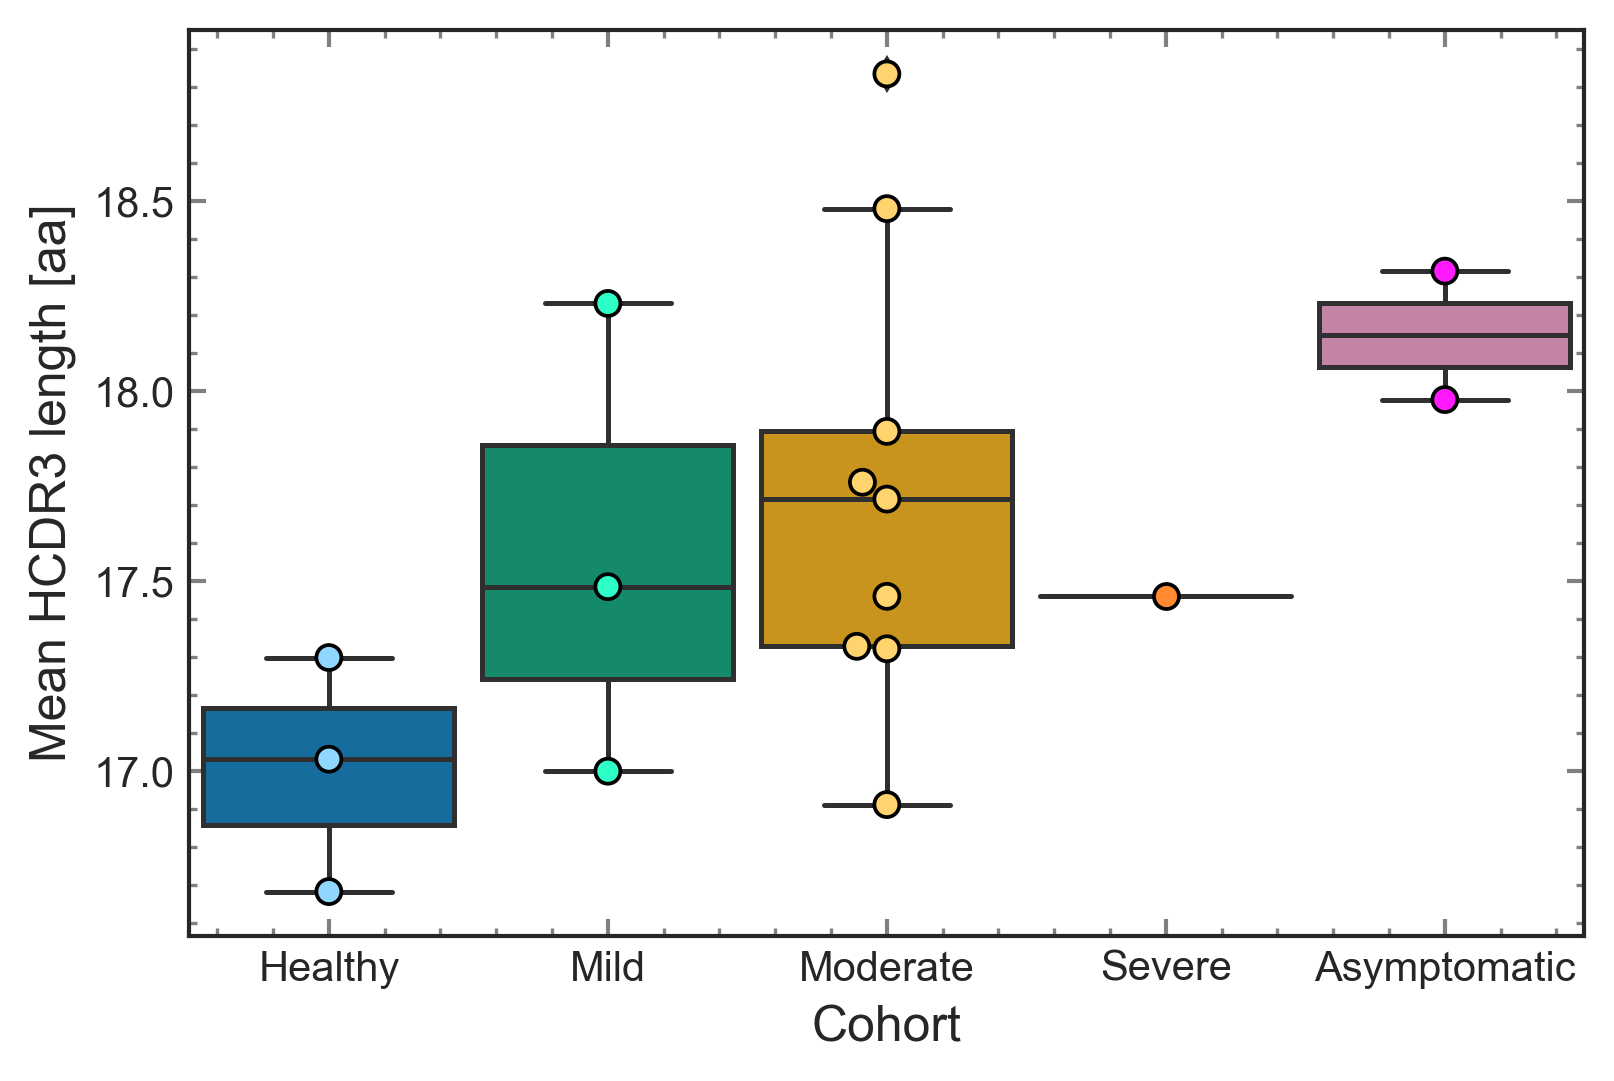

vd ins
Healthy vs. Mild: F_{1,4} = 0.0274, p-value = 0.877
Healthy vs. Moderate: F_{1,10} = 2.71, p-value = 0.131
Healthy vs. Severe: F_{1,2} = 12.2, p-value = 0.0729
Healthy vs. Asymptomatic: F_{1,3} = 13.0, p-value = 0.0367


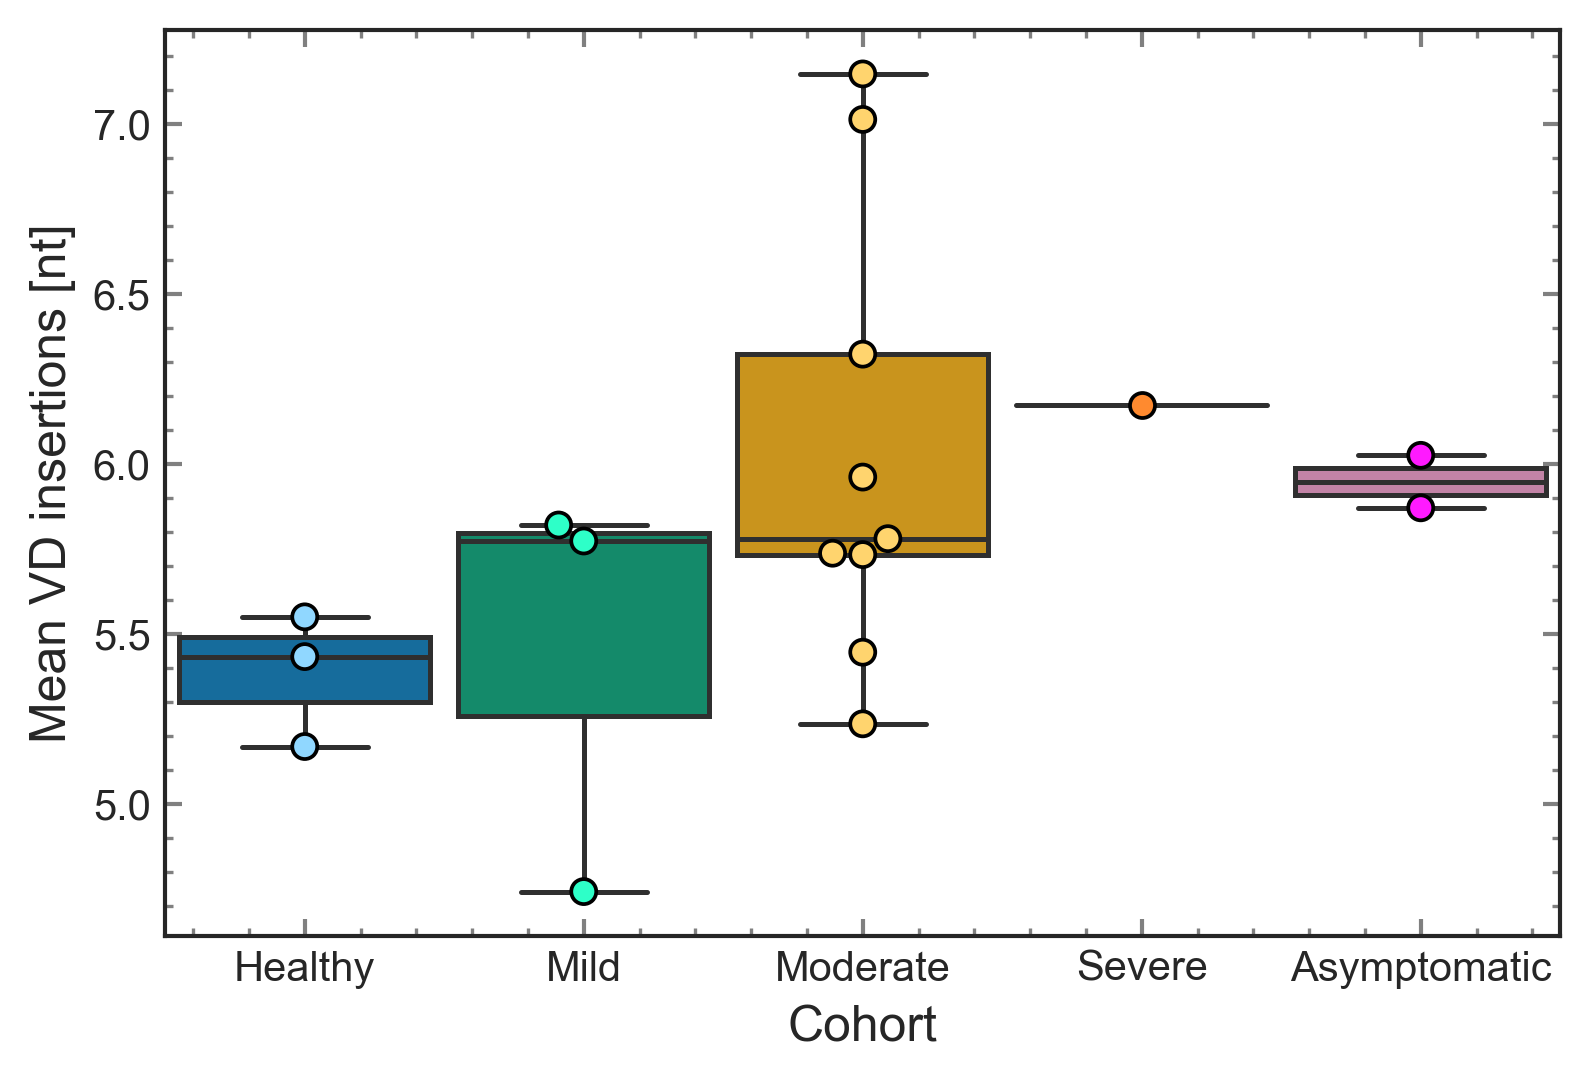

vd del
Healthy vs. Mild: F_{1,4} = 0.374, p-value = 0.574
Healthy vs. Moderate: F_{1,10} = 0.00201, p-value = 0.965
Healthy vs. Severe: F_{1,2} = 6.47, p-value = 0.126
Healthy vs. Asymptomatic: F_{1,3} = 0.0493, p-value = 0.839


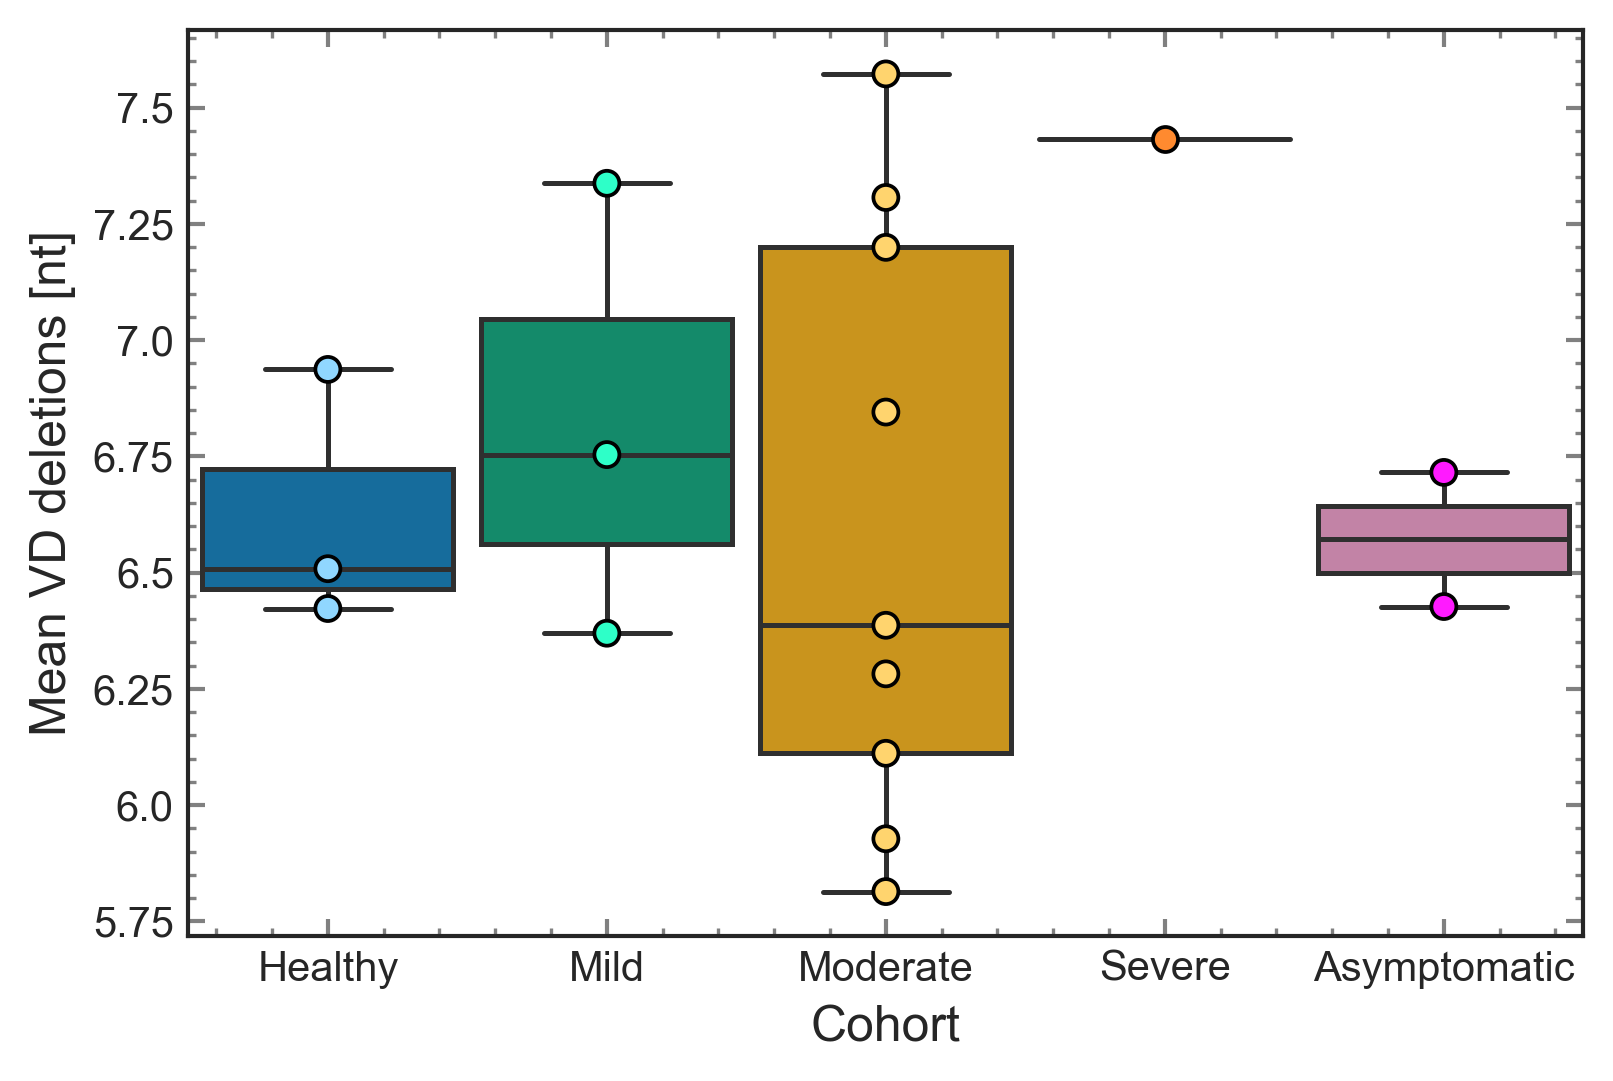

dj ins
Healthy vs. Mild: F_{1,4} = 1.08, p-value = 0.358
Healthy vs. Moderate: F_{1,10} = 1.13, p-value = 0.312
Healthy vs. Severe: F_{1,2} = 0.0948, p-value = 0.787
Healthy vs. Asymptomatic: F_{1,3} = 1.72, p-value = 0.281


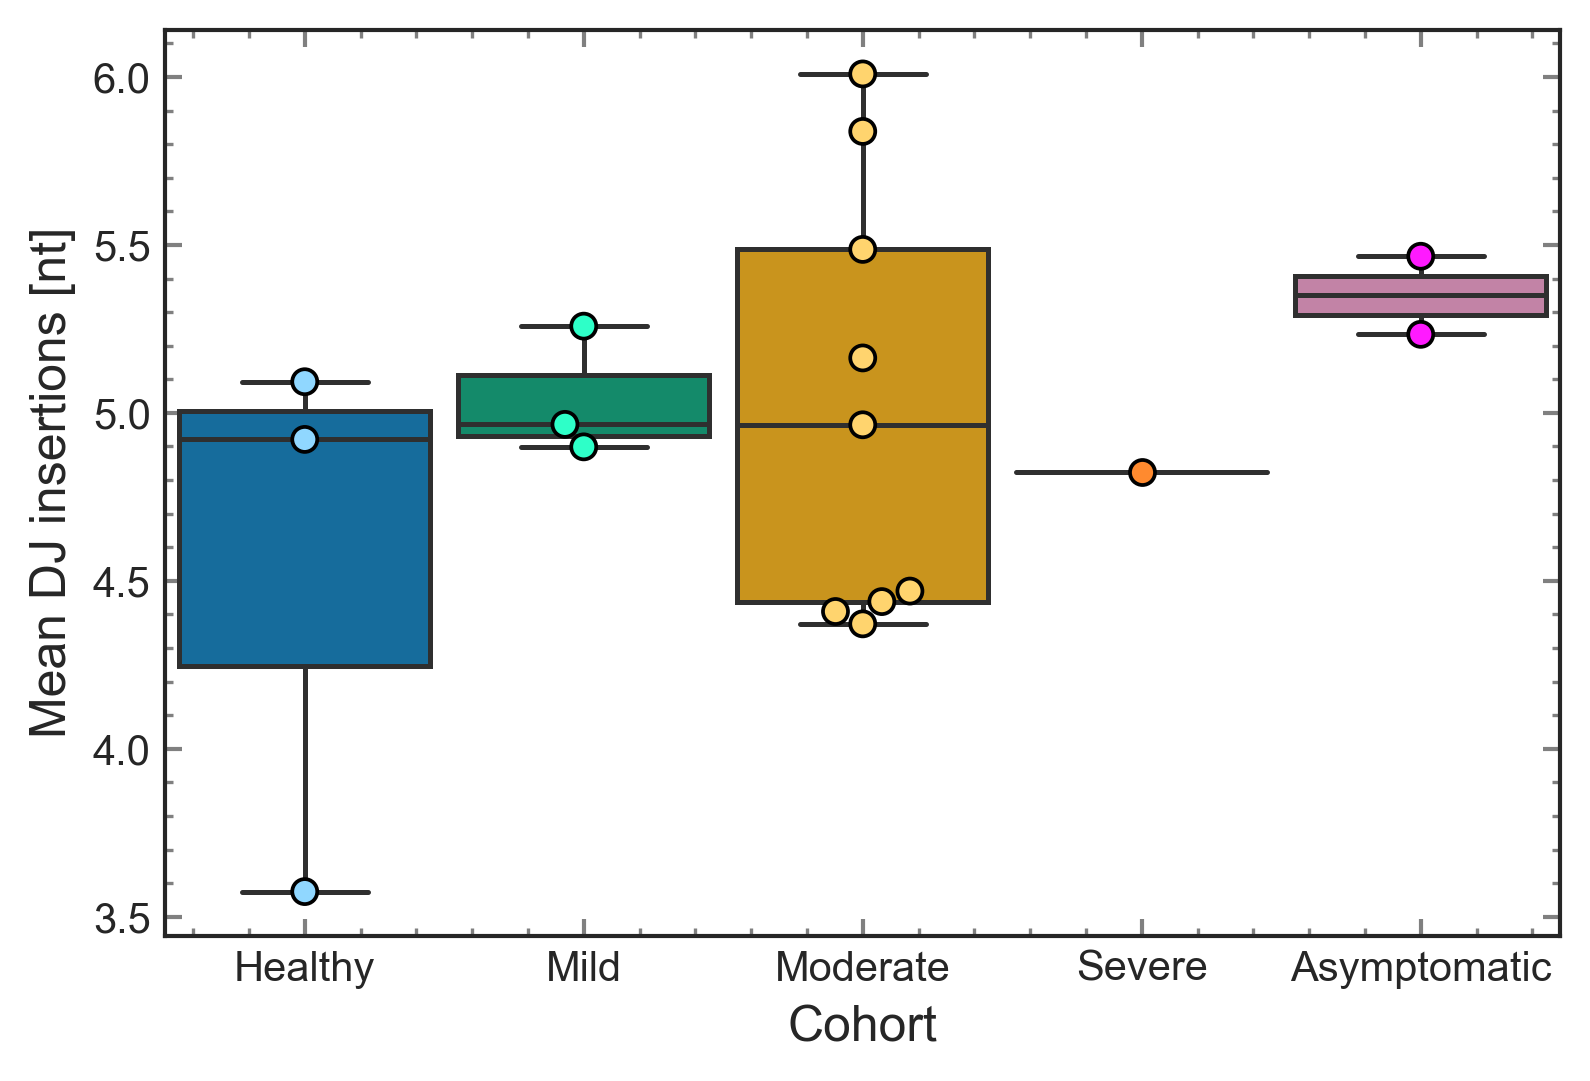

dj del
Healthy vs. Mild: F_{1,4} = 0.529, p-value = 0.507
Healthy vs. Moderate: F_{1,10} = 0.0158, p-value = 0.903
Healthy vs. Severe: F_{1,2} = 0.167, p-value = 0.723
Healthy vs. Asymptomatic: F_{1,3} = 0.519, p-value = 0.523


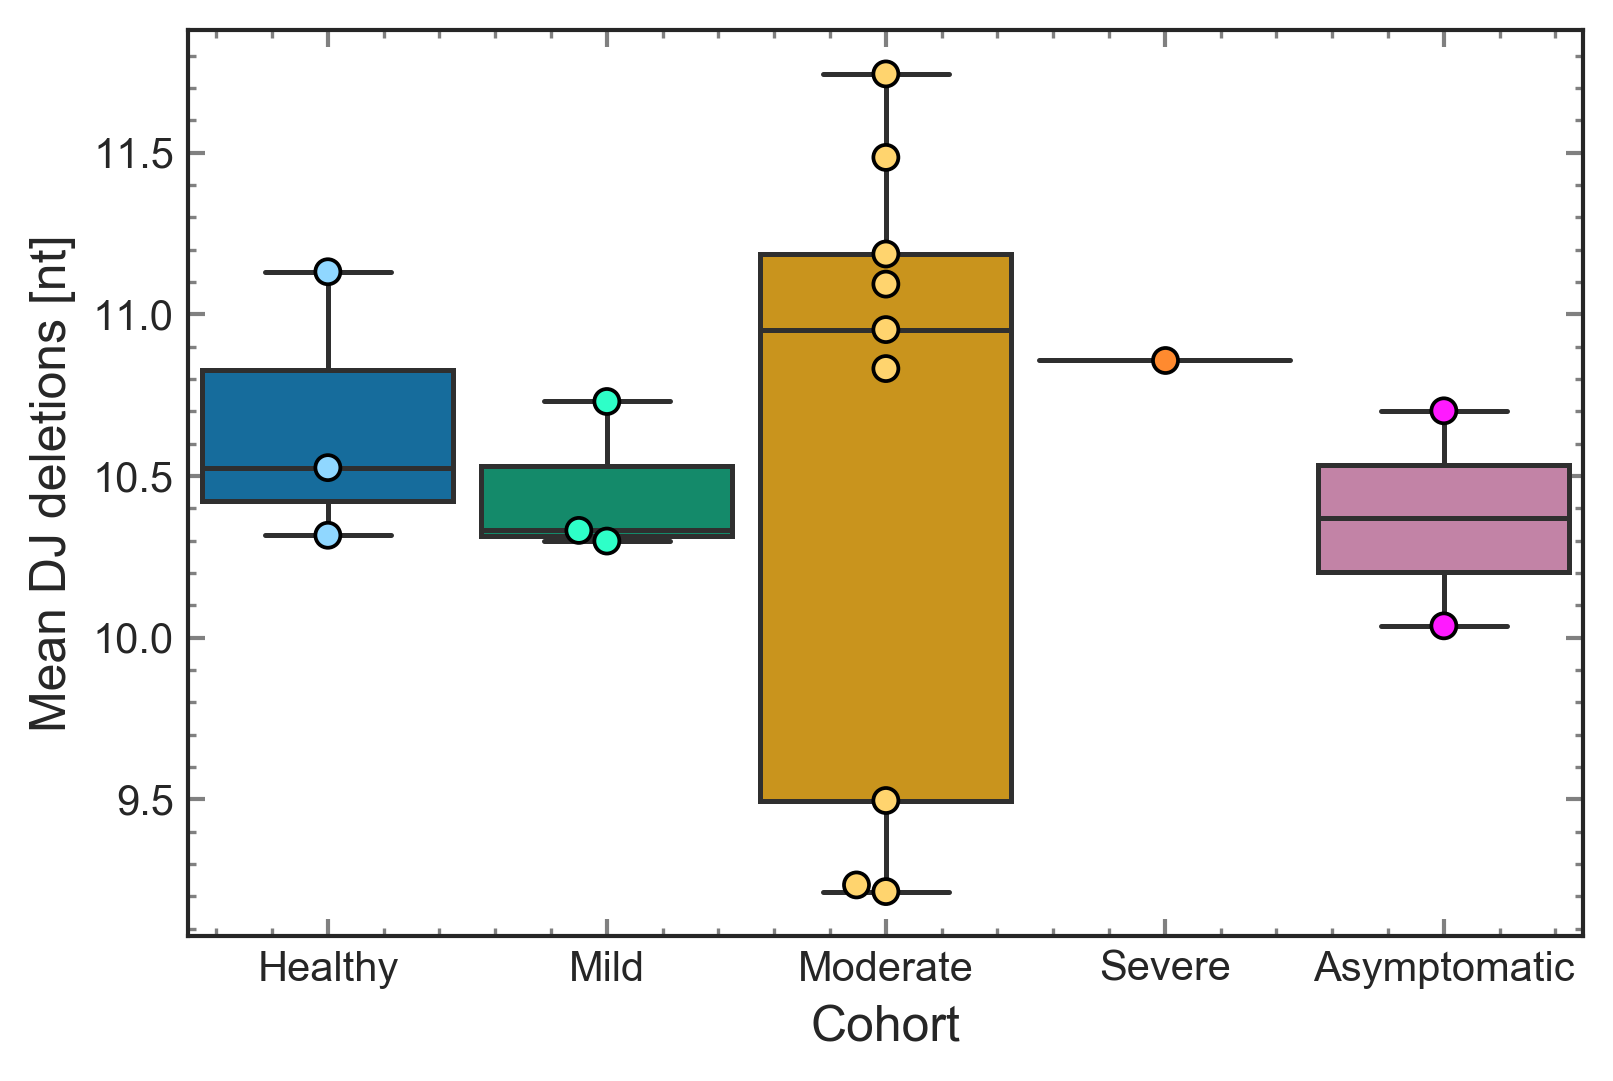

In [19]:
for observable in ['cdr3 length','vd ins',
                   'vd del','dj ins','dj del']:
    if 'gene' in observable:
        continue
    print(observable)
    perform_anova(progenitor_data, observable)

In [20]:
for observable in ['cdr3 length','vd ins',
                   'vd del','dj ins','dj del']:
    if 'gene' in observable:
        continue
    print(observable)
    perform_ks2samp(progenitor_data, observable)
    print()

cdr3 length
Healthy vs. Mild: D_{407,894} = 0.0746, p value = 0.0839
Healthy vs. Moderate: D_{407,4363} = 0.092, p value = 0.0034
Healthy vs. Severe: D_{407,646} = 0.0873, p value = 0.0412
Healthy vs. Asymptomatic: D_{407,1006} = 0.127, p value = 0.000159

vd ins
Healthy vs. Mild: D_{407,894} = 0.0892, p value = 0.0217
Healthy vs. Moderate: D_{407,4363} = 0.089, p value = 0.00515
Healthy vs. Severe: D_{407,646} = 0.0597, p value = 0.319
Healthy vs. Asymptomatic: D_{407,1006} = 0.109, p value = 0.00193

vd del
Healthy vs. Mild: D_{407,894} = 0.0365, p value = 0.833
Healthy vs. Moderate: D_{407,4363} = 0.032, p value = 0.828
Healthy vs. Severe: D_{407,646} = 0.0864, p value = 0.0447
Healthy vs. Asymptomatic: D_{407,1006} = 0.0395, p value = 0.736

dj ins
Healthy vs. Mild: D_{407,894} = 0.0619, p value = 0.222
Healthy vs. Moderate: D_{407,4363} = 0.0805, p value = 0.0152
Healthy vs. Severe: D_{407,646} = 0.0393, p value = 0.816
Healthy vs. Asymptomatic: D_{407,1006} = 0.0937, p value = 0.

cdr3 length
Healthy vs. Mild: F_{1,4} = 0.0534, p-value = 0.829
Healthy vs. Moderate: F_{1,10} = 2.06, p-value = 0.182
Healthy vs. Severe: F_{1,2} = 0.0485, p-value = 0.846
Healthy vs. Asymptomatic: F_{1,3} = 5.69, p-value = 0.0971


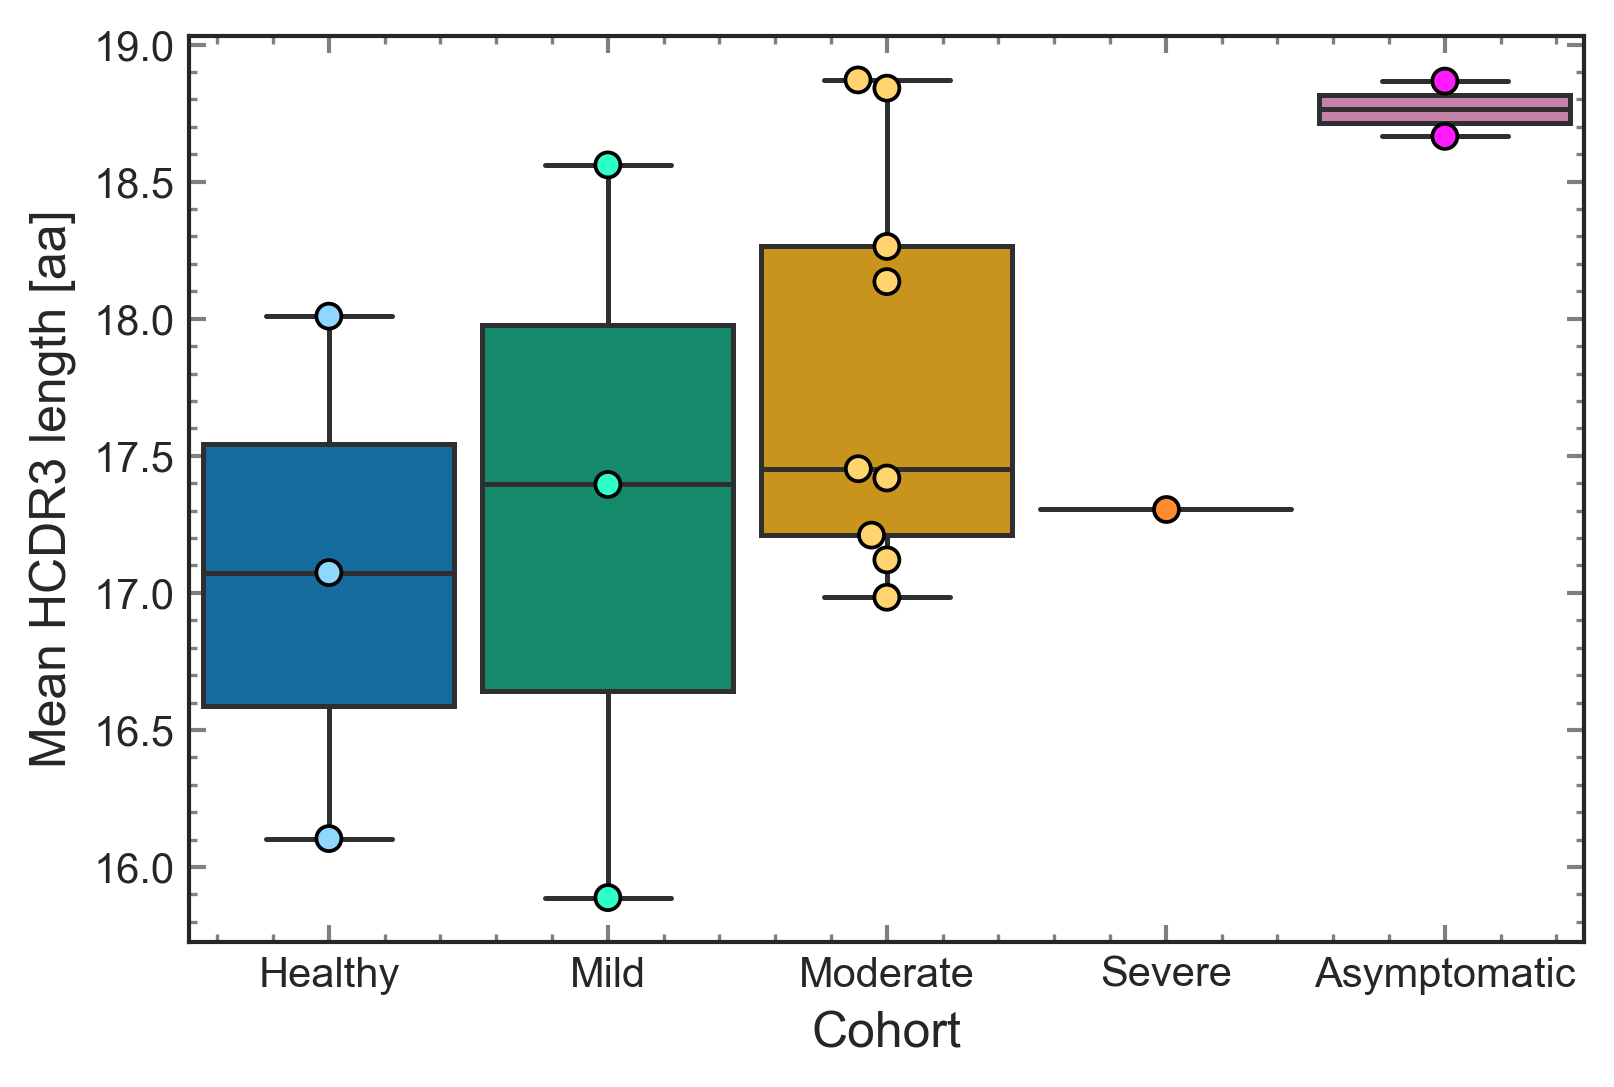

vd ins
Healthy vs. Mild: F_{1,4} = 0.94, p-value = 0.387
Healthy vs. Moderate: F_{1,10} = 2.08, p-value = 0.18
Healthy vs. Severe: F_{1,2} = 4.64, p-value = 0.164
Healthy vs. Asymptomatic: F_{1,3} = 6.61, p-value = 0.0825


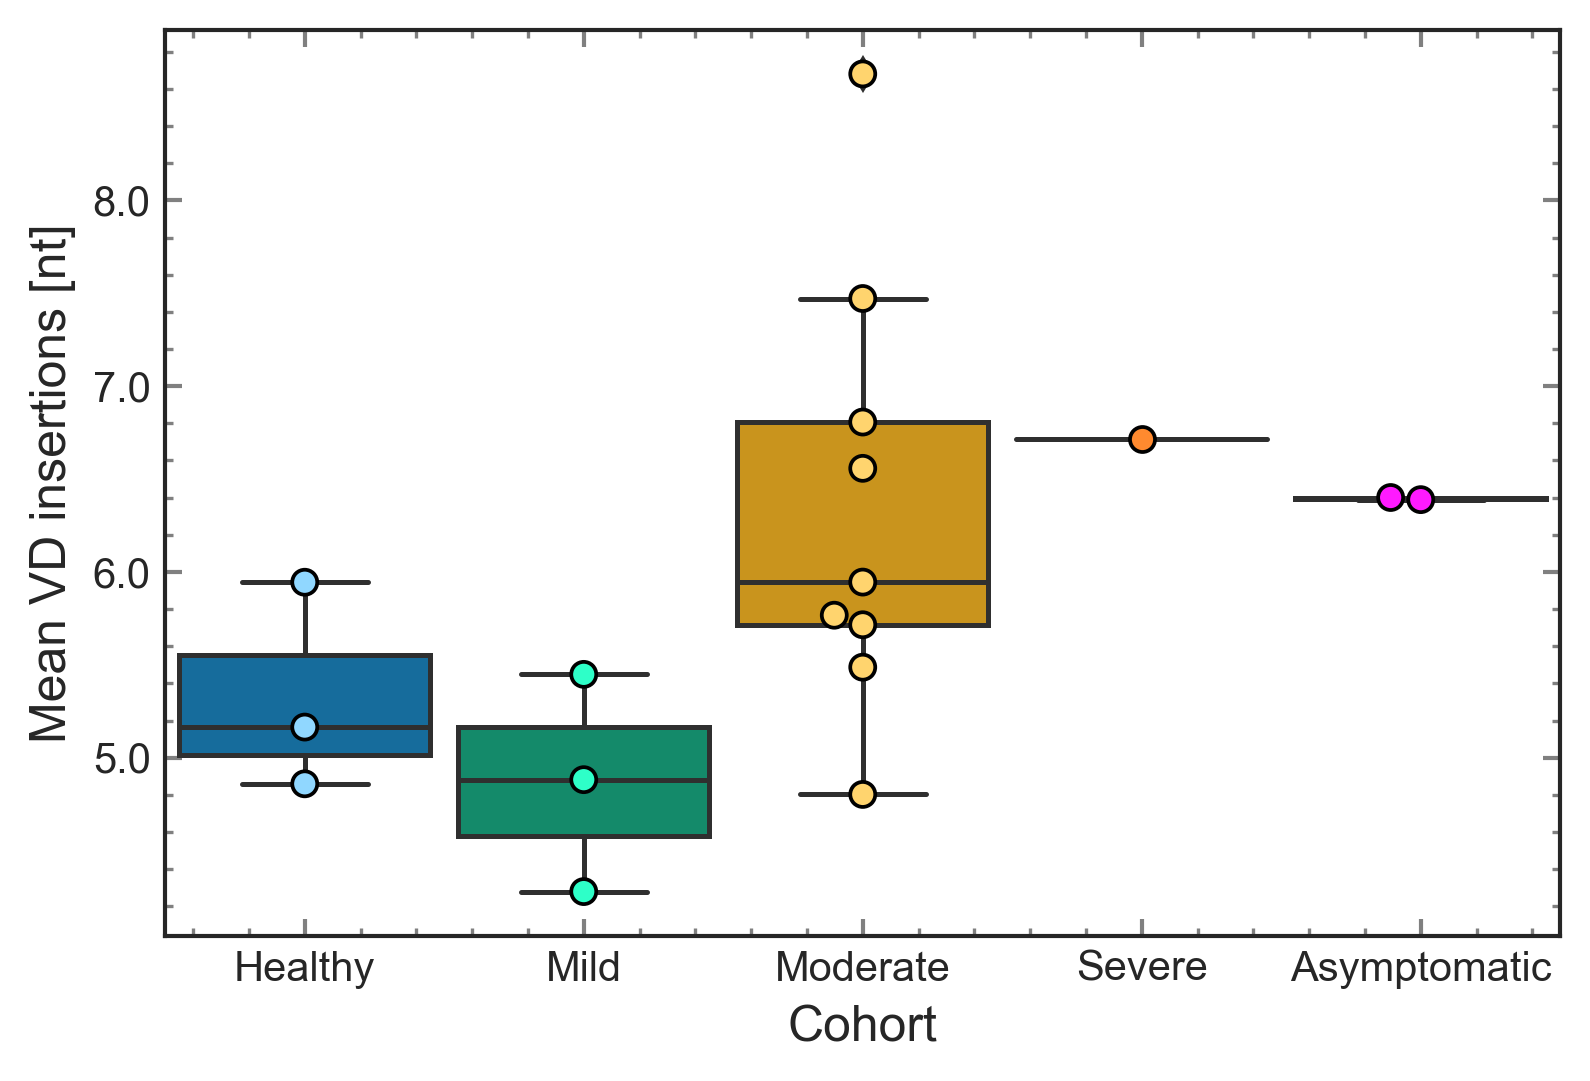

vd del
Healthy vs. Mild: F_{1,4} = 0.174, p-value = 0.698
Healthy vs. Moderate: F_{1,10} = 0.00212, p-value = 0.964
Healthy vs. Severe: F_{1,2} = 0.893, p-value = 0.444
Healthy vs. Asymptomatic: F_{1,3} = 0.406, p-value = 0.569


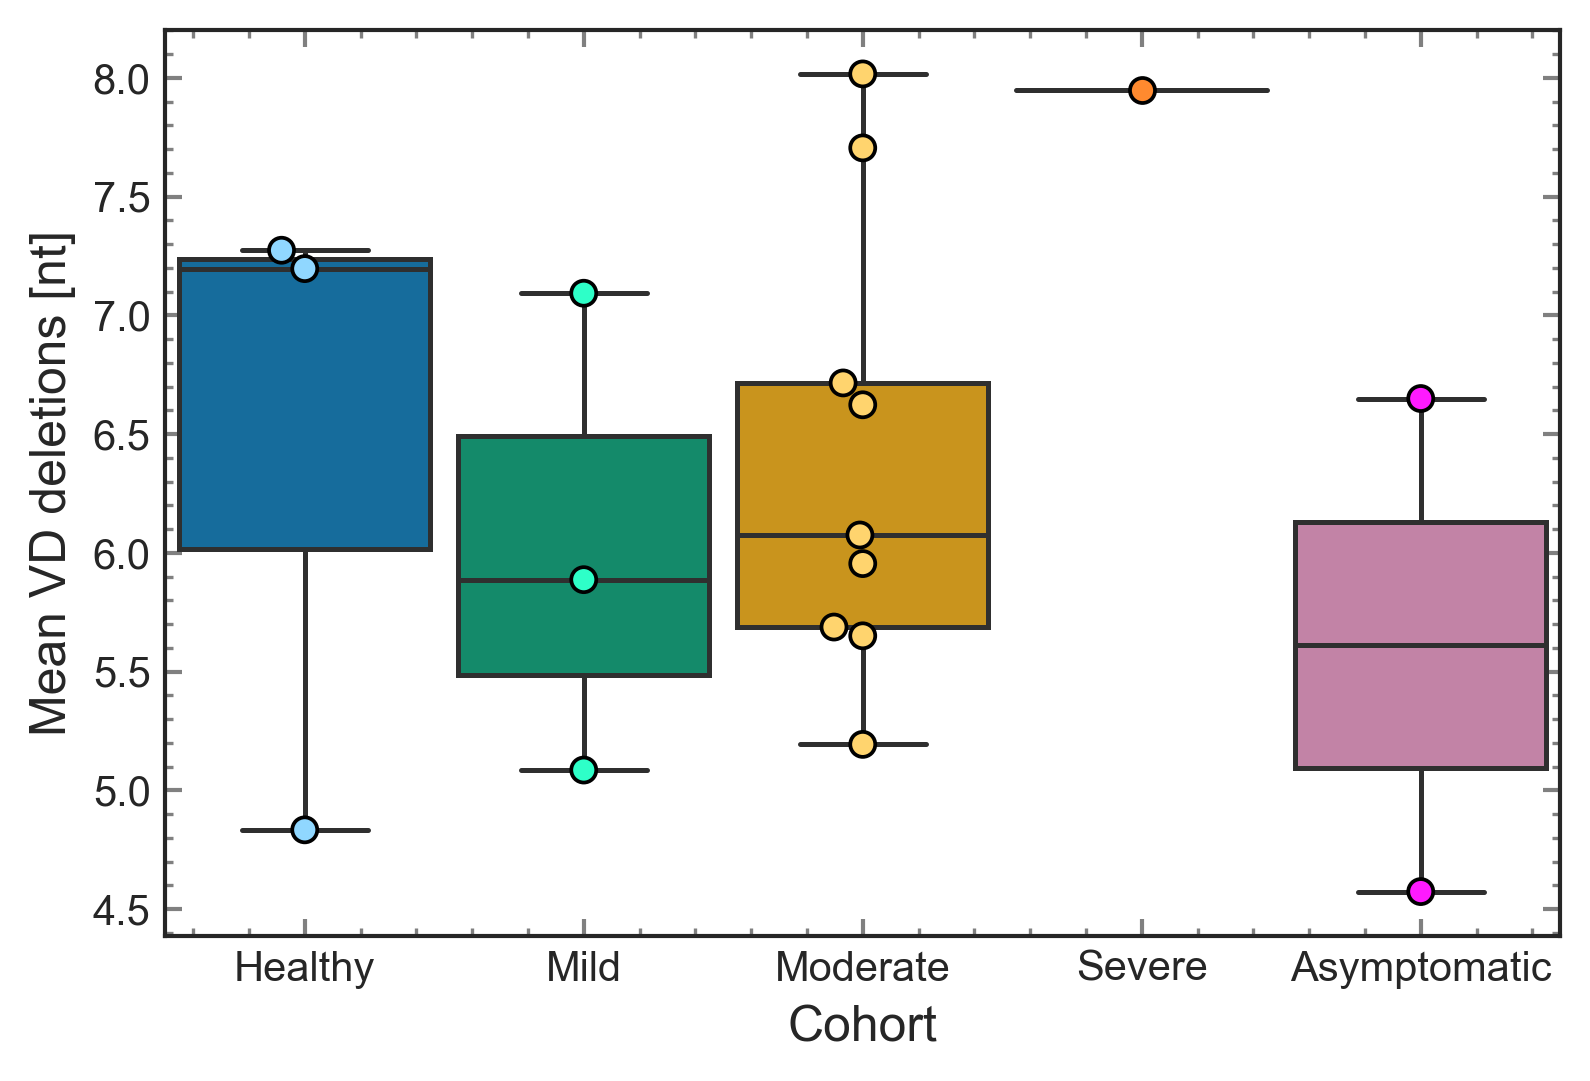

dj ins
Healthy vs. Mild: F_{1,4} = 0.278, p-value = 0.626
Healthy vs. Moderate: F_{1,10} = 0.656, p-value = 0.437
Healthy vs. Severe: F_{1,2} = 0.0977, p-value = 0.784
Healthy vs. Asymptomatic: F_{1,3} = 4.03, p-value = 0.138


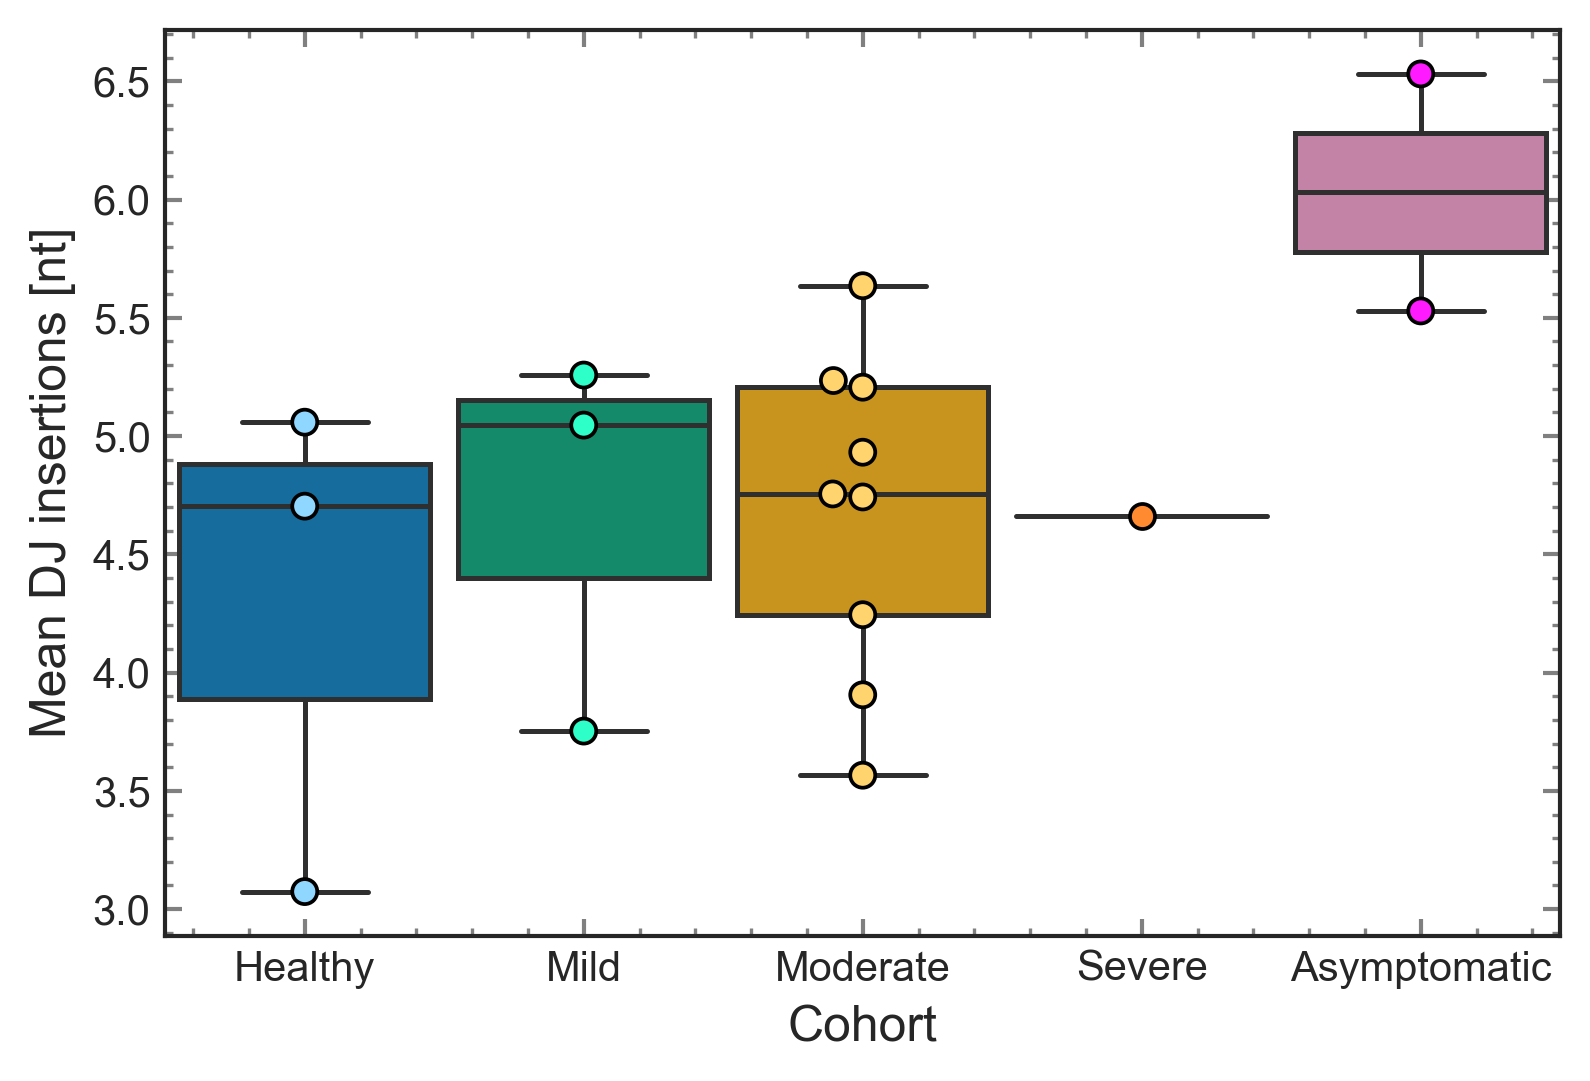

dj del
Healthy vs. Mild: F_{1,4} = 3.52, p-value = 0.134
Healthy vs. Moderate: F_{1,10} = 5.19, p-value = 0.046
Healthy vs. Severe: F_{1,2} = 4.08, p-value = 0.181
Healthy vs. Asymptomatic: F_{1,3} = 1.15, p-value = 0.361


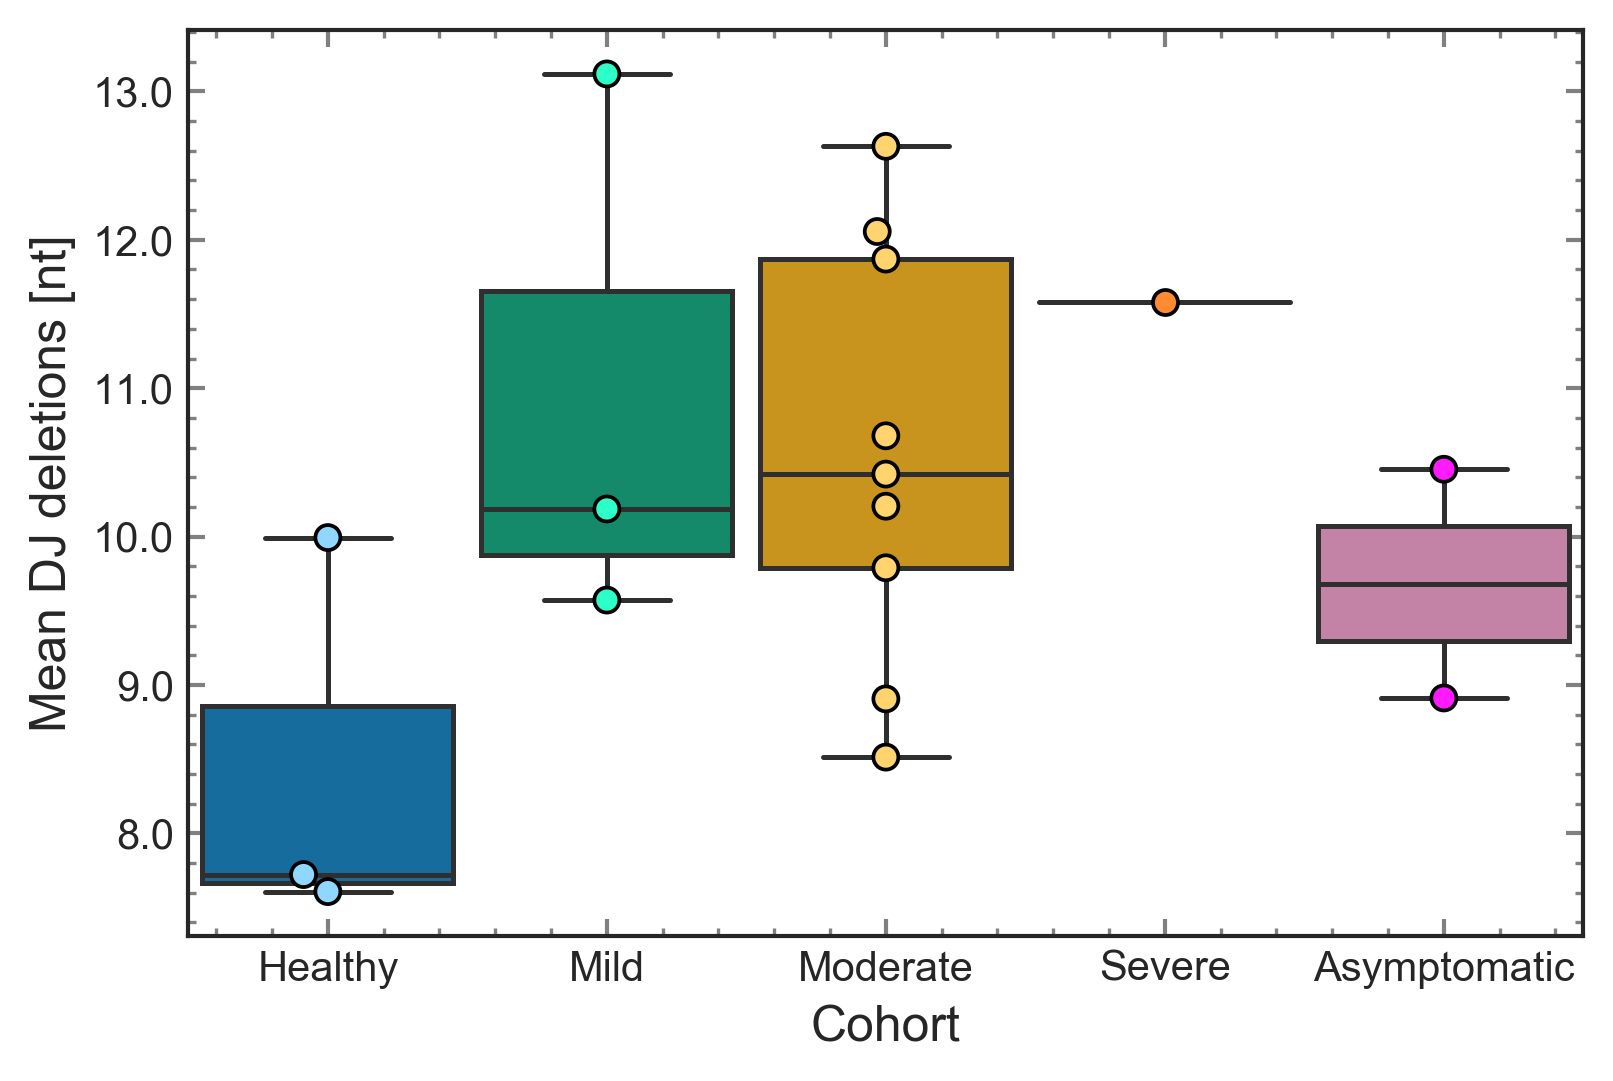

In [21]:
for observable in ['cdr3 length','vd ins',
                   'vd del','dj ins','dj del']:
    if 'gene' in observable:
        continue
    print(observable)
    perform_anova(nonsingleton_data, observable)

In [22]:
for observable in ['cdr3 length','vd ins',
                   'vd del','dj ins','dj del']:
    if 'gene' in observable:
        continue
    print(observable)
    perform_ks2samp(nonsingleton_data, observable)
    print()

cdr3 length
Healthy vs. Mild: D_{838,2948} = 0.149, p value = 6.3e-13
Healthy vs. Moderate: D_{838,17536} = 0.134, p value = 7.05e-13
Healthy vs. Severe: D_{838,2565} = 0.151, p value = 5.56e-13
Healthy vs. Asymptomatic: D_{838,4306} = 0.248, p value = 5.320000000000002e-38

vd ins
Healthy vs. Mild: D_{838,2948} = 0.126, p value = 1.86e-09
Healthy vs. Moderate: D_{838,17536} = 0.0947, p value = 1.17e-06
Healthy vs. Severe: D_{838,2565} = 0.101, p value = 4.63e-06
Healthy vs. Asymptomatic: D_{838,4306} = 0.192, p value = 8.85e-23

vd del
Healthy vs. Mild: D_{838,2948} = 0.219, p value = 1.5400000000000002e-27
Healthy vs. Moderate: D_{838,17536} = 0.0922, p value = 2.47e-06
Healthy vs. Severe: D_{838,2565} = 0.119, p value = 2.6e-08
Healthy vs. Asymptomatic: D_{838,4306} = 0.111, p value = 6.99e-08

dj ins
Healthy vs. Mild: D_{838,2948} = 0.0723, p value = 0.00205
Healthy vs. Moderate: D_{838,17536} = 0.0818, p value = 4.47e-05
Healthy vs. Severe: D_{838,2565} = 0.0765, p value = 0.00115